### Read data into PySpark Dataframe.

In [0]:
from pyspark.sql.types import *
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import pandas as pd
from pyspark.sql.functions import explode, col
from pyspark.sql.functions import expr, col, explode, udf
from urllib.parse import urlparse
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.functions import size, col
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import col, size
from pyspark.ml.feature import StringIndexer
from pyspark.sql.functions import when, col
from pyspark.sql import SparkSession
from pyspark.sql.functions import when, col, size
from pyspark.sql.functions import when, col, randn


pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

spark = SparkSession.builder.getOrCreate()

In [0]:
profiles = spark.read.parquet('/linkedin/people')

In [0]:
companies = spark.read.parquet('/linkedin/companies')

In [0]:
meta_industries_12 = {
    'Furniture and Home Furnishings Manufacturing': 'Manufacturing',
    'Investment Banking': 'Financial and Investment',
    'Architecture and Planning': 'Services',
    'Wholesale': 'Services',
    'Travel Arrangements': 'Services',
    'Ranching': 'Miscellaneous',
    'Hospitals and Health Care': 'Healthcare and Medical',
    'Book and Periodical Publishing': 'Services',
    'Printing Services': 'Services',
    'Professional Training and Coaching': 'Services',
    'Computers and Electronics Manufacturing': 'Manufacturing',
    'Shipbuilding': 'Manufacturing',
    'Public Policy Offices': 'Government and Public Policy',
    'Software Development': 'Technology',
    'Outsourcing and Offshoring Consulting': 'Services',
    'Retail Groceries': 'Retail and Consumer Goods',
    'Education Administration Programs': 'Education and Training',
    'Plastics Manufacturing': 'Manufacturing',
    'Renewable Energy Semiconductor Manufacturing': 'Manufacturing',
    'Computer Networking Products': 'Technology',
    'Events Services': 'Services',
    'Information Services': 'Services',
    'Food and Beverage Services': 'Services',
    'Semiconductor Manufacturing': 'Manufacturing',
    'Business Consulting and Services': 'Services',
    'Insurance': 'Services',
    'Financial Services': 'Services',
    'Wireless Services': 'Services',
    'Computer Hardware Manufacturing': 'Technology',
    'Public Safety': 'Services',
    'Maritime Transportation': 'Transportation and Logistics',
    'Tobacco Manufacturing': 'Manufacturing',
    'Writing and Editing': 'Services',
    'Veterinary Services': 'Services',
    'Staffing and Recruiting': 'Services',
    'Accounting': 'Services',
    'International Affairs': 'Government and Public Policy',
    'Spectator Sports': 'Miscellaneous',
    'Glass, Ceramics and Concrete Manufacturing': 'Manufacturing',
    'Chemical Manufacturing': 'Manufacturing',
    'Mining': 'Miscellaneous',
    'E-Learning Providers': 'Technology',
    'Security and Investigations': 'Services',
    'Translation and Localization': 'Services',
    'Automation Machinery Manufacturing': 'Technology',
    'Computer and Network Security': 'Technology',
    'Political Organizations': 'Government and Public Policy',
    'Environmental Services': 'Government and Public Policy',
    'Oil and Gas': 'Miscellaneous',
    'Real Estate': 'Real Estate and Construction',
    'Think Tanks': 'Government and Public Policy',
    'Executive Offices': 'Miscellaneous',
    'Law Practice': 'Services',
    'Nanotechnology Research': 'Miscellaneous',
    'International Trade and Development': 'Government and Public Policy',
    'Personal Care Product Manufacturing': 'Manufacturing',
    'Philanthropic Fundraising Services': 'Services',
    'Entertainment Providers': 'Media and Entertainment',
    'Market Research': 'Media and Entertainment',
    'Movies, Videos, and Sound': 'Media and Entertainment',
    'Sporting Goods Manufacturing': 'Manufacturing',
    'Graphic Design': 'Services',
    'Technology, Information and Internet': 'Technology',
    'IT Services and IT Consulting': 'Technology',
    'Retail Office Equipment': 'Retail and Consumer Goods',
    'Wholesale Import and Export': 'Services',
    'Capital Markets': 'Financial and Investment',
    'Law Enforcement': 'Services',
    'Freight and Package Transportation': 'Transportation and Logistics',
    'Industrial Machinery Manufacturing': 'Manufacturing',
    'Non-profit Organizations': 'Miscellaneous',
    'Retail Art Supplies': 'Retail and Consumer Goods',
    'Animation and Post-production': 'Media and Entertainment',
    'Transportation, Logistics, Supply Chain and Storage': 'Transportation and Logistics',
    'Aviation and Aerospace Component Manufacturing': 'Transportation and Logistics',
    'Fundraising': 'Financial and Investment',
    'Railroad Equipment Manufacturing': 'Transportation and Logistics',
    'Construction': 'Real Estate and Construction',
    'Investment Management': 'Financial and Investment',
    'Utilities': 'Miscellaneous',
    'Retail Luxury Goods and Jewelry': 'Retail and Consumer Goods',
    'Warehousing and Storage': 'Transportation and Logistics',
    'Media Production': 'Media and Entertainment',
    'Gambling Facilities and Casinos': 'Media and Entertainment',
    'Defense and Space Manufacturing': 'Manufacturing',
    'Facilities Services': 'Services',
    'Government Relations Services': 'Government and Public Policy',
    'Advertising Services': 'Media and Entertainment',
    'Paper and Forest Product Manufacturing': 'Manufacturing',
    'Packaging and Containers Manufacturing': 'Manufacturing',
    'Telecommunications': 'Technology',
    'Medical Equipment Manufacturing': 'Healthcare and Medical',
    'Beverage Manufacturing': 'Manufacturing',
    'Restaurants': 'Retail and Consumer Goods',
    'Leasing Non-residential Real Estate': 'Real Estate and Construction',
    'Newspaper Publishing': 'Media and Entertainment',
    'Armed Forces': 'Miscellaneous',
    'Appliances, Electrical, and Electronics Manufacturing': 'Manufacturing',
    'Hospitality': 'Services',
    'Pharmaceutical Manufacturing': 'Healthcare and Medical',
    'Research Services': 'Services',
    'Retail Apparel and Fashion': 'Retail and Consumer Goods',
    'Photography': 'Media and Entertainment',
    'Wellness and Fitness Services': 'Services',
    'Truck Transportation': 'Transportation and Logistics',
    'Consumer Services': 'Services',
    'Wholesale Building Materials': 'Services',
    'Human Resources Services': 'Services',
    'Airlines and Aviation': 'Transportation and Logistics',
    'Machinery Manufacturing': 'Manufacturing',
    'Individual and Family Services': 'Services',
    'Motor Vehicle Manufacturing': 'Manufacturing',
    'Performing Arts': 'Media and Entertainment',
    'Museums, Historical Sites, and Zoos': 'Media and Entertainment',
    'Broadcast Media Production and Distribution': 'Media and Entertainment',
    'Banking': 'Financial and Investment',
    'Recreational Facilities': 'Miscellaneous',
    'Government Administration': 'Government and Public Policy',
    'Public Relations and Communications Services': 'Media and Entertainment',
    'Fisheries': 'Miscellaneous',
    'Medical Practices': 'Healthcare and Medical',
    'Religious Institutions': 'Miscellaneous',
    'Online Audio and Video Media': 'Media and Entertainment',
    'Artists and Writers': 'Miscellaneous',
    'Biotechnology Research': 'Healthcare and Medical',
    'Legal Services': 'Services',
    'Retail': 'Retail and Consumer Goods',
    'Civil Engineering': 'Services',
    'Libraries': 'Miscellaneous',
    'Alternative Dispute Resolution': 'Miscellaneous',
    'Manufacturing': 'Miscellaneous',
    'Design Services': 'Services',
    'Dairy Product Manufacturing': 'Manufacturing',
    'Higher Education': 'Education and Training',
    'Civic and Social Organizations': 'Miscellaneous',
    'Textile Manufacturing': 'Manufacturing',
    'Venture Capital and Private Equity Principals': 'Financial and Investment',
    'Mental Health Care': 'Healthcare and Medical',
    'Musicians': 'Media and Entertainment',
    'Farming': 'Miscellaneous',
    'Computer Games': 'Media and Entertainment',
    'Strategic Management Services': 'Services',
    'Food and Beverage Manufacturing': 'Manufacturing',
    'Primary and Secondary Education': 'Education and Training',
    'Alternative Medicine': 'Healthcare and Medical',
    'Legislative Offices': 'Services',
    'Administration of Justice': 'Services',
    'Mobile Gaming Apps': 'Media and Entertainment'
}

In [0]:
from pyspark.sql.functions import col

meta_industry = udf( lambda x: meta_industries_12[x] )
companies = companies.filter(companies.industries.isNotNull())
companies = companies.withColumn('meta_industry', meta_industry(col('industries')))

### Data processing 

In [0]:
df=companies

#first filtering out companies with null in column 'url'
df = df.filter(col("url").isNotNull())

In [0]:
from pyspark.sql.functions import expr
# Selecting only the required columns and exploding 'similar' column
exploded_df = df.select("company_id", "id", "name", explode("similar").alias("similar_exploded"))

# Extracting the 'Links' value into a new column
exploded_df = exploded_df.withColumn("similar_links", col("similar_exploded.Links"))

# Dropping the 'similar_exploded' column if no longer needed
exploded_df = exploded_df.drop("similar_exploded")

# Define a function to extract company names from URLs
def extract_company_name(url):
    parsed_url = urlparse(url)
    path_components = parsed_url.path.split('/')
    company_name = path_components[-1].split('?')[0]  # Extracting the name and removing any query parameters
    return company_name

# Create a UDF (User Defined Function) from the above function
extract_company_name_udf = udf(extract_company_name)

# Apply the UDF to create a new column 'company_name'
exploded_df = exploded_df.withColumn("company_name_extracted_from_url", extract_company_name_udf(col("similar_links")))

# Show the resulting DataFrame
#exploded_df.show(truncate=50)

In [0]:
from pyspark.sql.functions import col, when


df2 = exploded_df.selectExpr(
    "company_id as company_id2",
    "id as id2",
    "name as name2",
    "similar_links as similar_links2",
    "company_name_extracted_from_url as company_name_extracted_from_url2"
)

# Performing the self-join
joined_df = exploded_df.join(df2, exploded_df.id == df2.company_name_extracted_from_url2)

# Selecting required columns from the joined DataFrame
result_df = joined_df.select(
    exploded_df.id,
    exploded_df.name,
    df2.id2,
    df2.name2

).distinct()


result_df = result_df.withColumn("lowest_name", when(col("name") < col("name2"), col("name")).otherwise(col("name2")))
result_df = result_df.withColumn("lowest_id", when(col("name") < col("name2"), col("id")).otherwise(col("id2")))
result_df = result_df.withColumn("highest_name", when(col("name") > col("name2"), col("name")).otherwise(col("name2")))
result_df = result_df.withColumn("highest_id", when(col("name") > col("name2"), col("id")).otherwise(col("id2")))

result_df = result_df.drop(result_df["id"])
result_df = result_df.drop(result_df["name"])
result_df = result_df.drop(result_df["id2"])
result_df = result_df.drop(result_df["name2"])

result_df = result_df.withColumnRenamed("lowest_name" ,"name")
result_df = result_df.withColumnRenamed("lowest_id" ,"id")
result_df = result_df.withColumnRenamed("highest_name" ,"name2")
result_df = result_df.withColumnRenamed("highest_id" ,"id2")


result_df = result_df.drop(result_df["name"])
result_df = result_df.drop(result_df["name2"])

#result_df.orderBy(result_df["id"].desc()).show()


In [0]:
first_joined_df = result_df.join(df, result_df["id"] == df["id"]).drop(result_df["id"])

first_joined_df = first_joined_df.withColumnRenamed("name" ,"company_A_name")
first_joined_df = first_joined_df.withColumnRenamed("about" ,"company_A_about")
first_joined_df = first_joined_df.withColumnRenamed("affiliated" ,"company_A_affiliated")
first_joined_df = first_joined_df.withColumnRenamed("company_id" ,"company_A_company_id")
first_joined_df = first_joined_df.withColumnRenamed("company_size" ,"company_A_company_size")
first_joined_df = first_joined_df.withColumnRenamed("country_code" ,"company_A_country_code")
first_joined_df = first_joined_df.withColumnRenamed("crunchbase_url" ,"company_A_crunchbase_url")
first_joined_df = first_joined_df.withColumnRenamed("employees" ,"company_A_employees")
first_joined_df = first_joined_df.withColumnRenamed("employees_in_linkedin" ,"company_A_employees_in_linkedin")
first_joined_df = first_joined_df.withColumnRenamed("followers" ,"company_A_followers")
first_joined_df = first_joined_df.withColumnRenamed("formatted_locations" ,"company_A_formatted_locations")
first_joined_df = first_joined_df.withColumnRenamed("founded" ,"company_A_founded")
first_joined_df = first_joined_df.withColumnRenamed("funding" ,"company_A_funding")
first_joined_df = first_joined_df.withColumnRenamed("headquarters" ,"company_A_headquarters")
first_joined_df = first_joined_df.withColumnRenamed("id" , "company_A_id")
first_joined_df = first_joined_df.withColumnRenamed("image" ,"company_A_image")
first_joined_df = first_joined_df.withColumnRenamed("industries" ,"company_A_industries")
first_joined_df = first_joined_df.withColumnRenamed("investors" ,"company_A_investors")
first_joined_df = first_joined_df.withColumnRenamed("locations" ,"company_A_locations")
first_joined_df = first_joined_df.withColumnRenamed("logo" ,"company_A_logo")
first_joined_df = first_joined_df.withColumnRenamed("organization_type" ,"company_A_organization_type")
first_joined_df = first_joined_df.withColumnRenamed("slogan" ,"company_A_slogan")
first_joined_df = first_joined_df.withColumnRenamed("specialties" ,"company_A_specialties")
first_joined_df = first_joined_df.withColumnRenamed("sphere" ,"company_A_sphere")
first_joined_df = first_joined_df.withColumnRenamed("stock_info" ,"company_A_stock_info")
first_joined_df = first_joined_df.withColumnRenamed("timestamp" ,"company_A_stock_timestamp")
first_joined_df = first_joined_df.withColumnRenamed("type" ,"company_A_stock_type")
first_joined_df = first_joined_df.withColumnRenamed("updates" ,"company_A_updates")
first_joined_df = first_joined_df.withColumnRenamed("url" ,"company_A_url")
first_joined_df = first_joined_df.withColumnRenamed("website" ,"company_A_website")
first_joined_df = first_joined_df.drop(first_joined_df["meta_industry"])
first_joined_df = first_joined_df.drop(first_joined_df["similar"])

# Show the result
#first_joined_df.show()

In [0]:
second_joined_df = first_joined_df.join(df, first_joined_df["id2"] == df["id"]).drop(first_joined_df["id2"])

second_joined_df = second_joined_df.withColumnRenamed("name" ,"company_B_name")
second_joined_df = second_joined_df.withColumnRenamed("about" ,"company_B_about")
second_joined_df = second_joined_df.withColumnRenamed("affiliated" ,"company_B_affiliated")
second_joined_df = second_joined_df.withColumnRenamed("company_id" ,"company_B_company_id")
second_joined_df = second_joined_df.withColumnRenamed("company_size" , "company_B_company_size")
second_joined_df = second_joined_df.withColumnRenamed("country_code" ,"company_B_country_code")
second_joined_df = second_joined_df.withColumnRenamed("crunchbase_url" ,"company_B_crunchbase_url")
second_joined_df = second_joined_df.withColumnRenamed("employees" ,"company_B_employees")
second_joined_df = second_joined_df.withColumnRenamed("employees_in_linkedin" ,"company_B_employees_in_linkedin")
second_joined_df = second_joined_df.withColumnRenamed("followers" ,"company_B_followers")
second_joined_df = second_joined_df.withColumnRenamed("formatted_locations" ,"company_B_formatted_locations")
second_joined_df = second_joined_df.withColumnRenamed("founded" ,"company_B_founded")
second_joined_df = second_joined_df.withColumnRenamed("funding" ,"company_B_funding")
second_joined_df = second_joined_df.withColumnRenamed("headquarters" ,"company_B_headquarters")
second_joined_df = second_joined_df.withColumnRenamed("id" , "company_B_id")
second_joined_df = second_joined_df.withColumnRenamed("image" ,"company_B_image")
second_joined_df = second_joined_df.withColumnRenamed("industries" ,"company_B_industries")
second_joined_df = second_joined_df.withColumnRenamed("investors" ,"company_B_investors")
second_joined_df = second_joined_df.withColumnRenamed("locations" ,"company_B_locations")
second_joined_df = second_joined_df.withColumnRenamed("logo" ,"company_B_logo")
second_joined_df = second_joined_df.withColumnRenamed("organization_type" ,"company_B_organization_type")
second_joined_df = second_joined_df.withColumnRenamed("slogan" ,"company_B_slogan")
second_joined_df = second_joined_df.withColumnRenamed("specialties" ,"Company_B_specialties")
second_joined_df = second_joined_df.withColumnRenamed("sphere" ,"company_B_sphere")
second_joined_df = second_joined_df.withColumnRenamed("stock_info" ,"company_B_stock_info")
second_joined_df = second_joined_df.withColumnRenamed("timestamp" ,"company_B_stock_timestamp")
second_joined_df = second_joined_df.withColumnRenamed("type" ,"company_B_stock_type")
second_joined_df = second_joined_df.withColumnRenamed("updates" ,"company_B_updates")
second_joined_df = second_joined_df.withColumnRenamed("url" ,"company_B_url")
second_joined_df = second_joined_df.withColumnRenamed("website" ,"company_B_website")
second_joined_df = second_joined_df.drop(second_joined_df["meta_industry"])
second_joined_df = second_joined_df.drop(second_joined_df["similar"])

finalTable = second_joined_df.distinct()

finalTable.printSchema()

root
 |-- company_A_about: string (nullable = true)
 |-- company_A_affiliated: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- Links: string (nullable = true)
 |    |    |-- location: string (nullable = true)
 |    |    |-- subtitle: string (nullable = true)
 |    |    |-- title: string (nullable = true)
 |-- company_A_company_id: string (nullable = true)
 |-- company_A_company_size: string (nullable = true)
 |-- company_A_country_code: string (nullable = true)
 |-- company_A_crunchbase_url: string (nullable = true)
 |-- company_A_employees: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- img: string (nullable = true)
 |    |    |-- link: string (nullable = true)
 |    |    |-- subtitle: string (nullable = true)
 |    |    |-- title: string (nullable = true)
 |-- company_A_employees_in_linkedin: long (nullable = true)
 |-- company_A_followers: long (nullable = true)
 |-- company_A_formatted_locations: array (

In [0]:
##### finalTable

# List of company names
company_names = [
    'Altium Leadership',
    'American College of Music - ACM Online',
    'Arieca Inc.',
    'Bango Bowls',
    'Blue Llamas, Inc.'
]

# Filter the DataFrame based on the company names
filtered_df = finalTable.filter(col("company_A_name").isin(company_names))

# Order the filtered DataFrame by 'company_A_name' then by 'company_B_name'
ordered_df = filtered_df.orderBy(col("company_A_name"), col("company_B_name"))

In [0]:
new_column_order = [
    "company_A_name",
    "company_A_about",
    "company_A_affiliated",
    "company_A_company_id",
    "company_A_company_size",
    "company_A_country_code",
    "company_A_crunchbase_url",
    "company_A_employees",
    "company_A_employees_in_linkedin",
    "company_A_followers",
    "company_A_formatted_locations",
    "company_A_founded",
    "company_A_funding",
    "company_A_headquarters",
    "company_A_id",
    "company_A_image",
    "company_A_industries",
    "company_A_investors",
    "company_A_locations",
    "company_A_logo",
    "company_A_organization_type",
    "company_A_slogan",
    "company_A_specialties",
    "company_A_sphere",
    "company_A_stock_info",
    "company_A_stock_timestamp",
    "company_A_stock_type",
    "company_A_updates",
    "company_A_url",
    "company_A_website",
    "company_B_name",
    "company_B_about",
    "company_B_affiliated",
    "company_B_company_id",
    "company_B_company_size",
    "company_B_country_code",
    "company_B_crunchbase_url",
    "company_B_employees",
    "company_B_employees_in_linkedin",
    "company_B_followers",
    "company_B_formatted_locations",
    "company_B_founded",
    "company_B_funding",
    "company_B_headquarters",
    "company_B_id",
    "company_B_image",
    "company_B_industries",
    "company_B_investors",
    "company_B_locations",
    "company_B_logo",
    "company_B_organization_type",
    "company_B_slogan",
    "Company_B_specialties",
    "company_B_sphere",
    "company_B_stock_info",
    "company_B_stock_timestamp",
    "company_B_stock_type",
    "company_B_updates",
    "company_B_url",
    "company_B_website"
]

# Select columns in the desired order
df_reordered = ordered_df.select(new_column_order)

# Show the DataFrame with reordered columns
display(df_reordered)

company_A_name company_A_about company_A_affiliated company_A_company_id company_A_company_size company_A_country_code company_A_crunchbase_url company_A_employees company_A_employees_in_linkedin company_A_followers company_A_formatted_locations company_A_founded company_A_funding company_A_headquarters company_A_id company_A_image company_A_industries company_A_investors company_A_locations company_A_logo company_A_organization_type company_A_slogan company_A_specialties company_A_sphere company_A_stock_info company_A_stock_timestamp company_A_stock_type company_A_updates company_A_url company_A_website company_B_name company_B_about company_B_affiliated company_B_company_id company_B_company_size company_B_country_code company_B_crunchbase_url company_B_employees company_B_employees_in_linkedin company_B_followers company_B_formatted_locations company_B_founded company_B_funding company_B_headquarters company_B_id company_B_image company_B_industries company_B_investors company_B_locations company_B_logo company_B_organization_type company_B_slogan Company_B_specialties company_B_sphere company_B_stock_info company_B_stock_timestamp company_B_stock_type company_B_updates company_B_url company_B_website Altium Leadership In our work with teams, we have a track record of improving the factors that optimize productivity and positivity by an average of 20%! Management is more aligned. They are on the same page about defining their culture. Their focus shifts from individual agendas to team goals and strategies to achieve business results. The flow of effective communication between team members and departments increases and silos disappear. A culture of ownership and accountability help team members thrive. Roles and responsibilities become clearer. You will attract higher quality recruits. You will accelerate critical change management processes. You will learn how to use your team strengths at a higher level. Trust collaboration and cohesion take hold and propel team performance. Would it be okay if things got a little easier? The work of business is hard enough. Let us help you get everyone working and pulling together. Call (702) 807-4698 now for complimentary consultation and team diagnostic. List() 10118149 2-10 employees US null List(List(https://media.licdn.com/dms/image/C4D03AQEu25pYu79hkQ/profile-displayphoto-shrink_100_100/0/1640736298452?e=1698278400&v=beta&t=JUjmAYymLUqPs92mZ54BQVtA_6uo1ID75ol9svno1kk, https://www.linkedin.com/in/spencerhorn?trk=org-employees, I help organizations achieve sustainable productivity by transforming good teams into high-performing teams. Only 12% of teams worldwide reach this…, 🏔 Spencer Horn, M.S., CTPC, CSP), List(https://media.licdn.com/dms/image/C4D03AQFWBwnmhV7HkA/profile-displayphoto-shrink_100_100/0/1517061889647?e=1698278400&v=beta&t=y5Alcw--KV8LyngqSCKnM62l4T2DKr8Z5SidCLAhaA0, https://ph.linkedin.com/in/lindlee-villanueva-92410624?trk=org-employees, Relationship Manager and Assistant to President at Altium Leadership, Lindlee Villanueva)) 2 1384 List(170 Odell Ln, North Salt Lake, Utah 84054, US) 2015 null North Salt Lake, Utah altiumleadership https://media.licdn.com/dms/image/C511BAQG-ETzOha6ozA/company-background_10000/0/1555712157150?e=1693425600&v=beta&t=sRLgOK9HzL9WmXjwgeaSVf73JgROsURsNqUAavoJOzc Business Consulting and Services null List(170 Odell Ln North Salt Lake, Utah 84054, US) https://media.licdn.com/dms/image/C4D0BAQGs62zfXdqT3g/company-logo_200_200/0/1535048422669?e=2147483647&v=beta&t=NsBuIO-2hGlmOW-yLkZpSEbjCcuYlxRxpNXfUJPJClc Privately Held Imagine What It Would Feel Like To Have Your Team Perform At A Sustainably High Level. Cultural Assessment, Leadership Assessment, Job Modeling, Behavioral Interviewing, Management Consulting, Learning Implementation, Executive Coaching, Team Coaching, and Keynote Business Consulting and Services null 2023-08-23 Privately Held List(List(null, 2, Join Christian Napier and Spencer Horn on the TeamWork a Better Way podcast as 

### Missingness Mechanisms

In [0]:
q2DF = companies

First we define what is the correct definition of “null” value for each column:

1. **about**: Null values are considered when the 'about' column is empty.
2. **affiliated**: Null values are considered when the 'affiliated' column has no elements.
3. **company_id**: Null values are considered when the 'company_id' column is empty.
4. **company_size**: Null values are considered when the 'company_size' column is empty.
5. **country_code**: Null values are considered when the 'country_code' column is empty.
6. **crunchbase_url**: Null values are considered when the 'crunchbase_url' column is empty.
7. **employees**: Null values are considered when the 'employees' column has no elements.
8. **employees_in_linkedin**: Null values are considered when the 'employees_in_linkedin' column is empty.
9. **followers**: Null values are considered when the 'followers' column equals 0.
10. **formatted_locations**: Null values are considered when the 'formatted_locations' column has no elements.
11. **founded**: Null values are considered when the 'founded' column equals 0.
12. **funding**: Null values are considered when the 'funding' column is empty.
13. **headquarters**: Null values are considered when the 'headquarters' column is empty.
14. **id**: Null values are considered when the 'id' column is empty.
15. **image**: Null values are considered when the 'image' column is empty.
16. **industries**: Null values are considered when the 'industries' column is empty.
17. **investors**: Null values are considered when the 'investors' column is empty.
18. **locations**: Null values are considered when the 'locations' column has no elements.
19. **logo**: Null values are considered when the 'logo' column is empty.
20. **name**: Null values are considered when the 'name' column is empty.
21. **organization_type**: Null values are considered when the 'organization_type' column is empty.
22. **similar**: Null values are considered when the 'similar' column has no elements.
23. **slogan**: Null values are considered when the 'slogan' column is empty.
24. **specialties**: Null values are considered when the 'specialties' column is empty.
25. **sphere**: Null values are considered when the 'sphere' column is empty.
26. **stock_info**: Null values are considered when the 'stock_info' column is empty.
27. **timestamp**: Null values are considered when the 'timestamp' column is empty.
28. **type**: Null values are considered when the 'type' column is empty.
29. **updates**: Null values are considered when the 'updates' column has no elements.
30. **url**: Null values are considered when the 'url' column is empty.
31. **website**: Null values are considered when the 'website' column is empty.
32. **meta_industry**: Null values are considered when the 'meta_industry' column is empty.

**Assessing the completeness of data in each column of the DataFrame by displaying the count of missing values and the percentage of missing values relative to the total number of rows in the DataFrame :**

In [0]:
total_rows = q2DF.count()

### about
null_about = q2DF.filter(col('about').isNull())
about_missing_percentage = (null_about.count() / total_rows) * 100

### affiliated
empty_affiliated = q2DF.filter(size(q2DF['affiliated']) == 0)
affiliated_missing_percentage = (empty_affiliated.count() / total_rows) * 100

### company_id
null_company_id = q2DF.filter(col('company_id').isNull())
company_id_missing_percentage = (null_company_id.count() / total_rows) * 100

### company_size
null_company_size = q2DF.filter(col('company_size').isNull())
company_size_missing_percentage = (null_company_size.count() / total_rows) * 100

### country_code
null_country_code = q2DF.filter(col('country_code').isNull())
country_code_missing_percentage = (null_country_code.count() / total_rows) * 100

### crunchbase_url
null_crunchbase_url = q2DF.filter(col('crunchbase_url').isNull())
crunchbase_url_missing_percentage = (null_crunchbase_url.count() / total_rows) * 100

### employees
empty_employees = q2DF.filter(size(q2DF['employees']) == 0)
employees_missing_percentage = (empty_employees.count() / total_rows) * 100

### employees_in_linkedin
null_employees_in_linkedin = q2DF.filter(col('employees_in_linkedin').isNull())
employees_in_linkedin_missing_percentage = (null_employees_in_linkedin.count() / total_rows) * 100

### followers
zero_followers = q2DF.filter(q2DF['followers'].isNull())
followers_missing_percentage = (zero_followers.count() / total_rows) * 100

### formatted_locations
empty_formatted_locations = q2DF.filter(size(q2DF['formatted_locations']) == 0)
formatted_locations_missing_percentage = (empty_formatted_locations.count() / total_rows) * 100

### founded
zero_founded = q2DF.filter(q2DF['founded'] == 0)
founded_missing_percentage = (zero_founded.count() / total_rows) * 100

### funding
null_funding = q2DF.filter(col('funding').isNull())
funding_missing_percentage = (null_funding.count() / total_rows) * 100

### headquarters
null_headquarters = q2DF.filter(col('headquarters').isNull())
headquarters_missing_percentage = (null_headquarters.count() / total_rows) * 100

### id
null_id = q2DF.filter(col('id').isNull())
id_missing_percentage = (null_id.count() / total_rows) * 100

### image
null_image = q2DF.filter(col('image').isNull())
image_missing_percentage = (null_image.count() / total_rows) * 100

### industries
null_industries = q2DF.filter(col('industries').isNull())
industries_missing_percentage = (null_industries.count() / total_rows) * 100

### investors
null_investors = q2DF.filter(col('investors').isNull())
investors_missing_percentage = (null_investors.count() / total_rows) * 100

### locations
empty_locations = q2DF.filter(size(q2DF['locations']) == 0)
locations_missing_percentage = (empty_locations.count() / total_rows) * 100

### logo
null_logo = q2DF.filter(col('logo').isNull())
logo_missing_percentage = (null_logo.count() / total_rows) * 100

### name
null_name = q2DF.filter(col('name').isNull())
name_missing_percentage = (null_name.count() / total_rows) * 100

### organization_type
null_organization_type = q2DF.filter(col('organization_type').isNull())
organization_type_missing_percentage = (null_organization_type.count() / total_rows) * 100

### similar
empty_similar = q2DF.filter(size(q2DF['similar']) == 0)
similar_missing_percentage = (empty_similar.count() / total_rows) * 100

### slogan
null_slogan = q2DF.filter(col('slogan').isNull())
slogan_missing_percentage = (null_slogan.count() / total_rows) * 100

### specialties
null_specialties = q2DF.filter(col('specialties').isNull())
specialties_missing_percentage = (null_specialties.count() / total_rows) * 100

### sphere
null_sphere = q2DF.filter(col('sphere').isNull())
sphere_missing_percentage = (null_sphere.count() / total_rows) * 100

### stock_info
null_stock_info = q2DF.filter(col('stock_info').isNull())
stock_info_missing_percentage = (null_stock_info.count() / total_rows) * 100

### timestamp
null_timestamp = q2DF.filter(col('timestamp').isNull())
timestamp_missing_percentage = (null_timestamp.count() / total_rows) * 100

### type
null_type = q2DF.filter(col('type').isNull())
type_missing_percentage = (null_type.count() / total_rows) * 100

### updates
empty_updates = q2DF.filter(size(q2DF['updates']) == 0)
updates_missing_percentage = (empty_updates.count() / total_rows) * 100
### url
null_url = q2DF.filter(col('url').isNull())
url_missing_percentage = (null_url.count() / total_rows) * 100

### website
null_website = q2DF.filter(col('website').isNull())
website_missing_percentage = (null_website.count() / total_rows) * 100

### meta_industry
null_meta_industry = q2DF.filter(col('meta_industry').isNull())
meta_industry_missing_percentage = (null_meta_industry.count() / total_rows) * 100


In [0]:
total_rows = q2DF.count()

columns = []
counts = []
missing_percentages = []

def calculate_missing_percentage(null_count):
    return (null_count / total_rows) * 100

def print_result(column_name, null_count, missing_percentage):
    columns.append(column_name)
    counts.append(null_count)
    missing_percentages.append(missing_percentage)

columns_to_check = {
    'about': q2DF.filter(col('about').isNull()),
    'affiliated': q2DF.filter(size(q2DF['affiliated']) == 0),
    'company_id': q2DF.filter(col('company_id').isNull()),
    'company_size': q2DF.filter(col('company_size').isNull()),
    'country_code': q2DF.filter(col('country_code').isNull()),
    'crunchbase_url': q2DF.filter(col('crunchbase_url').isNull()),
    'employees': q2DF.filter(size(q2DF['employees']) == 0),
    'employees_in_linkedin': q2DF.filter(col('employees_in_linkedin').isNull()),
    'followers': q2DF.filter(q2DF['followers'].isNull()),
    'formatted_locations': q2DF.filter(size(q2DF['formatted_locations']) == 0),
    'founded': q2DF.filter(q2DF['founded'] == 0),
    'funding': q2DF.filter(col('funding').isNull()),
    'headquarters': q2DF.filter(col('headquarters').isNull()),
    'id': q2DF.filter(col('id').isNull()),
    'image': q2DF.filter(col('image').isNull()),
    'industries': q2DF.filter(col('industries').isNull()),
    'investors': q2DF.filter(col('investors').isNull()),
    'locations': q2DF.filter(size(q2DF['locations']) == 0),
    'logo': q2DF.filter(col('logo').isNull()),
    'name': q2DF.filter(col('name').isNull()),
    'organization_type': q2DF.filter(col('organization_type').isNull()),
    'similar': q2DF.filter(size(q2DF['similar']) == 0),
    'slogan': q2DF.filter(col('slogan').isNull()),
    'specialties': q2DF.filter(col('specialties').isNull()),
    'sphere': q2DF.filter(col('sphere').isNull()),
    'stock_info': q2DF.filter(col('stock_info').isNull()),
    'timestamp': q2DF.filter(col('timestamp').isNull()),
    'type': q2DF.filter(col('type').isNull()),
    'updates': q2DF.filter(size(q2DF['updates']) == 0),
    'url': q2DF.filter(col('url').isNull()),
    'website': q2DF.filter(col('website').isNull()),
    'meta_industry': q2DF.filter(col('meta_industry').isNull())
}

for column, filter_df in columns_to_check.items():
    null_count = filter_df.count()
    missing_percentage = calculate_missing_percentage(null_count)
    print_result(column, null_count, missing_percentage)

result_df = pd.DataFrame({
    'Column': columns,
    'Null Count': counts,
    'Missing Percentage': missing_percentages
})

styled_df = result_df.style.hide_index().highlight_null(null_color='red').set_properties(**{'text-align': 'center'})

styled_df.set_table_styles([dict(selector='table', props=[('border-collapse', 'collapse')])])

Column,Null Count,Missing Percentage
about,769435,71.175640
affiliated,1072287,99.190592
company_id,0,0.000000
company_size,76404,7.067658
country_code,0,0.000000
crunchbase_url,1075521,99.489749
employees,758784,70.190382
employees_in_linkedin,764928,70.758725
followers,0,0.000000
formatted_locations,0,0.000000


Visualizing the number of missing values for each column with barPlot :

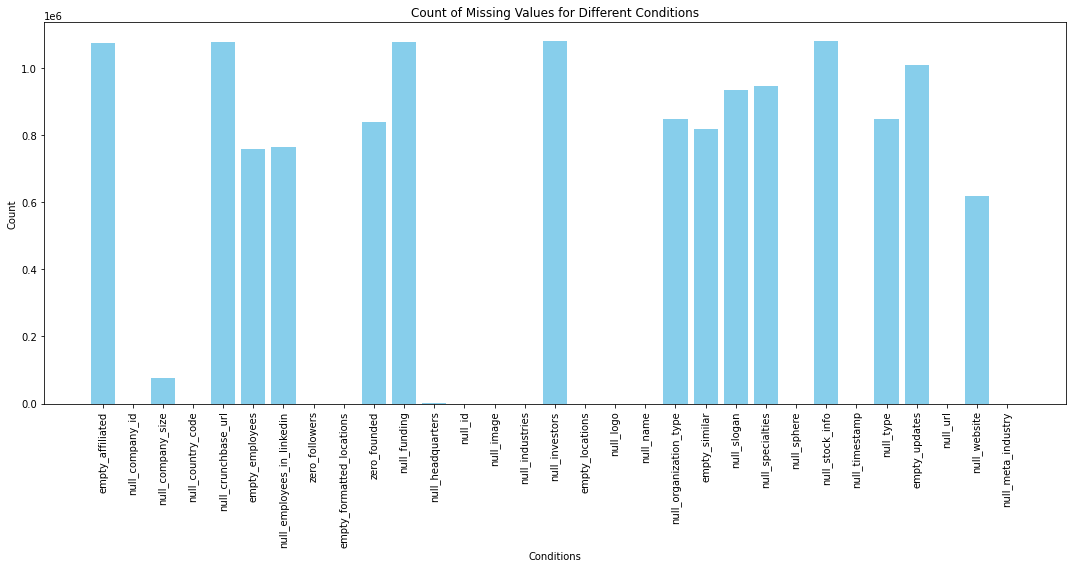

In [0]:
conditions = {
    "empty_affiliated": empty_affiliated.count(),
    "null_company_id": null_company_id.count(),
    "null_company_size": null_company_size.count(),
    "null_country_code": null_country_code.count(),
    "null_crunchbase_url": null_crunchbase_url.count(),
    "empty_employees": empty_employees.count(),
    "null_employees_in_linkedin": null_employees_in_linkedin.count(),
    "zero_followers": zero_followers.count(),
    "empty_formatted_locations": empty_formatted_locations.count(),
    "zero_founded": zero_founded.count(),
    "null_funding": null_funding.count(),
    "null_headquarters": null_headquarters.count(),
    "null_id": null_id.count(),
    "null_image": null_image.count(),
    "null_industries": null_industries.count(),
    "null_investors": null_investors.count(),
    "empty_locations": empty_locations.count(),
    "null_logo": null_logo.count(),
    "null_name": null_name.count(),
    "null_organization_type": null_organization_type.count(),
    "empty_similar": empty_similar.count(),
    "null_slogan": null_slogan.count(),
    "null_specialties": null_specialties.count(),
    "null_sphere": null_sphere.count(),
    "null_stock_info": null_stock_info.count(),
    "null_timestamp": null_timestamp.count(),
    "null_type": null_type.count(),
    "empty_updates": empty_updates.count(),
    "null_url": null_url.count(),
    "null_website": null_website.count(),
    "null_meta_industry": null_meta_industry.count()
}

plt.figure(figsize=(15, 8))
plt.bar(conditions.keys(), conditions.values(), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Conditions')
plt.ylabel('Count')
plt.title('Count of Missing Values for Different Conditions')
plt.tight_layout()
plt.show()


Now after understanding the behaviour of the missing values in each column , we focus on the columns with at least 2% missing values and less than 95% missing values: 

1. about
2. company_size
3. employees
4. employees_in_linkedin
5. founded
6. organization_type
7. similar
8. slogan
9. specialties
10. type 
11. updates
12. website

**Before diving into classifying the missingness mechanism of each column , we need to understand the 3 types of missingness mechanisms :**

1. **Missing at Random (MAR)**:
  In MAR, the missingness is dependent only on observed data but not on the missing values themselves.
2. **Missing Completely at Random (MCAR)**:
  In this mechanism, the missingness of data is completely random and unrelated to any observed or unobserved variables.
3. **Missing Not at Random (MNAR)**:
  In MNAR, the missingness is dependent on unobserved data or missing values themselves, making it non-random.




In order to classify each column , we need first need to get an overview and a general image of the missing data.

We will start by visualizing the missing data patterns.

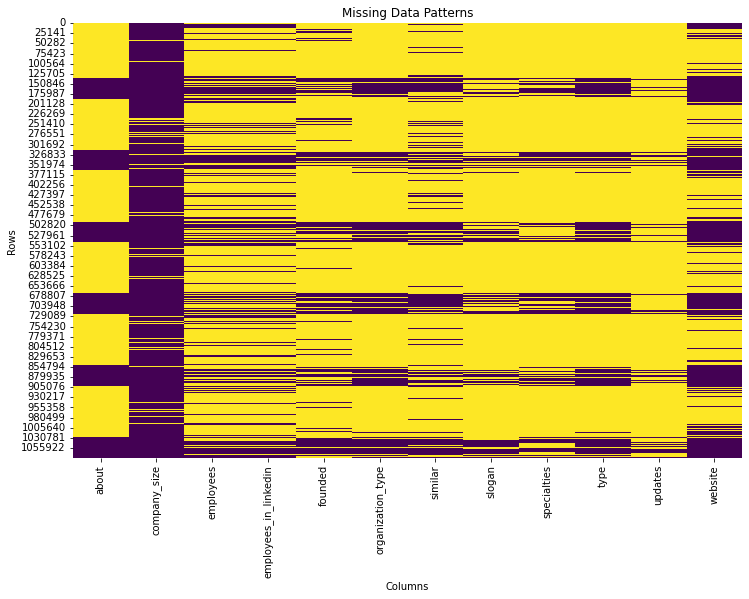

In [0]:
missing_conditions = {
    "about": col('about').isNull(),
    "company_size": col('company_size').isNull(),
    "employees": size(col('employees')) == 0,
    "employees_in_linkedin": col('employees_in_linkedin').isNull(),
    "founded": col('founded') == 0,
    "organization_type": col('organization_type').isNull(),
    "similar": size(col('similar')) == 0,
    "slogan": col('slogan').isNull(),
    "specialties": col('specialties').isNull(),
    "type": col('type').isNull(),
    "updates": size(col('updates')) == 0,
    "website": col('website').isNull(),
}

cookie = q2DF.select('about','company_size','employees','employees_in_linkedin', 'founded','organization_type','similar','slogan','specialties','type','updates','website')

missing_data = cookie.select([missing_conditions[c].alias(c) for c in cookie.columns]).toPandas()

plt.figure(figsize=(12, 8))
sns.heatmap(missing_data, cmap='viridis', cbar=False)
plt.title('Missing Data Patterns')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

Each column represents a feature, each row represents an observation, and the color indicates whether the data is missing or not , yellow line for missing value , purple for real value.

We will cluster columns with similar distributions to gain a clearer perspective, enhancing our view on the mechanisms behind missing values.

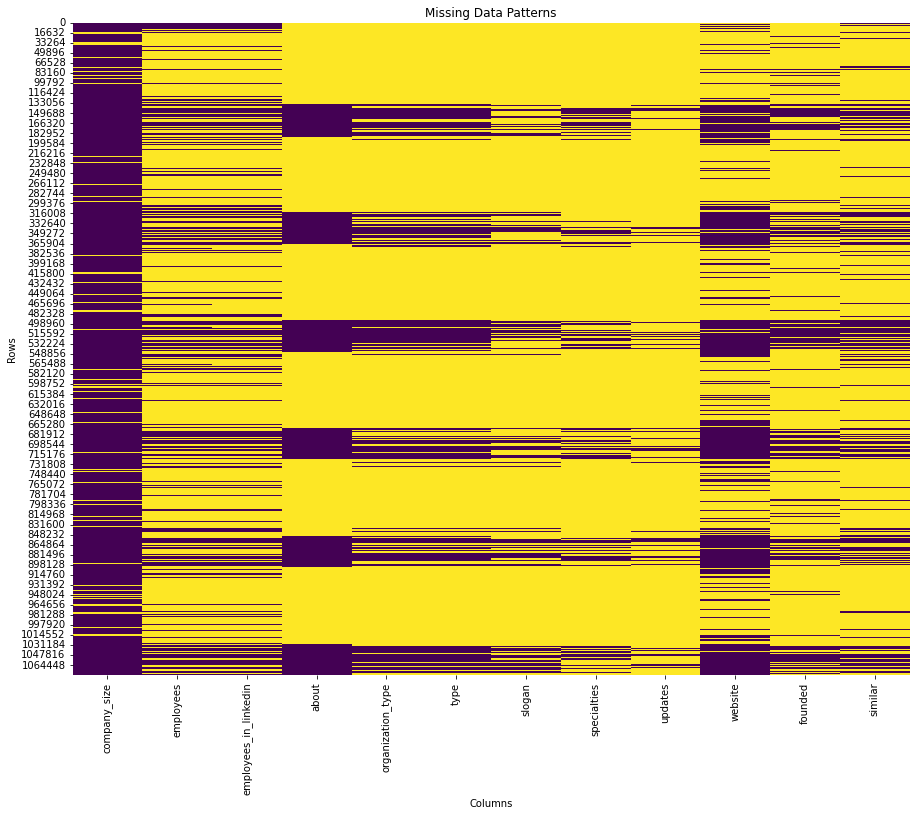

In [0]:
cookie = q2DF.select('company_size','employees','employees_in_linkedin', 'about', 'organization_type','type' , 'slogan','specialties','updates','website','founded', 'similar')

missing_data = cookie.select([missing_conditions[c].alias(c) for c in cookie.columns]).toPandas()

plt.figure(figsize=(15, 12))
sns.heatmap(missing_data, cmap='viridis', cbar=False)
plt.title('Missing Data Patterns')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

This heatmap will be very helpful in our further analysis , and we can clearly see that some columns have very similar behaviour and patterns for example :
- organization_type and type. 
- employees and employees_in_linkedin.
- updates , slogan and sepcialities.

**Before using our methods to tackle the missingness mechanisms, we will build a new dataframe named DFL by adding a null indicator column for each column which tells us where the null values are ,and that will be useful for the upcoming procedures.** 

In [0]:
DFL = q2DF

#Adding indicator column for each col , to indicate for null values
DFL = DFL.withColumn("about_null_indicator", when(col("about").isNull(), 1).otherwise(0))
DFL = DFL.withColumn("affiliated_null_indicator", when(size(col("affiliated")) == 0, 1).otherwise(0))
DFL = DFL.withColumn("company_id_null_indicator", when(col("company_id").isNull(), 1).otherwise(0))
DFL = DFL.withColumn("company_size_null_indicator", when(col("company_size").isNull(), 1).otherwise(0))
DFL = DFL.withColumn("country_code_null_indicator", when(col("country_code").isNull(), 1).otherwise(0))
DFL = DFL.withColumn("crunchbase_url_null_indicator", when(col("crunchbase_url").isNull(), 1).otherwise(0))
DFL = DFL.withColumn("employees_null_indicator", when(size(col("employees")) == 0, 1).otherwise(0))
DFL = DFL.withColumn("employees_in_linkedin_null_indicator", when(col("employees_in_linkedin").isNull(), 1).otherwise(0))
DFL = DFL.withColumn("followers_null_indicator", when(col("followers").isNull(), 1).otherwise(0))
DFL = DFL.withColumn("formatted_locations_null_indicator", when(size(col("formatted_locations")) == 0, 1).otherwise(0))
DFL = DFL.withColumn("founded_null_indicator", when(col("founded") == 0, 1).otherwise(0))
DFL = DFL.withColumn("funding_null_indicator", when(col("funding").isNull(), 1).otherwise(0))
DFL = DFL.withColumn("headquarters_null_indicator", when(col("headquarters").isNull(), 1).otherwise(0))
DFL = DFL.withColumn("id_null_indicator", when(col("id").isNull(), 1).otherwise(0))
DFL = DFL.withColumn("image_null_indicator", when(col("image").isNull(), 1).otherwise(0))
DFL = DFL.withColumn("industries_null_indicator", when(col("industries").isNull(), 1).otherwise(0))
DFL = DFL.withColumn("investors_null_indicator", when(col("investors").isNull(), 1).otherwise(0))
DFL = DFL.withColumn("locations_null_indicator", when(size(col("locations")) == 0, 1).otherwise(0))
DFL = DFL.withColumn("logo_null_indicator", when(col("logo").isNull(), 1).otherwise(0))
DFL = DFL.withColumn("name_null_indicator", when(col("name").isNull(), 1).otherwise(0))
DFL = DFL.withColumn("organization_type_null_indicator", when(col("organization_type").isNull(), 1).otherwise(0))
DFL = DFL.withColumn("similar_null_indicator", when(size(col("similar")) == 0, 1).otherwise(0))
DFL = DFL.withColumn("slogan_null_indicator", when(col("slogan").isNull(), 1).otherwise(0))
DFL = DFL.withColumn("specialties_null_indicator", when(col("specialties").isNull(), 1).otherwise(0))
DFL = DFL.withColumn("sphere_null_indicator", when(col("sphere").isNull(), 1).otherwise(0))
DFL = DFL.withColumn("stock_info_null_indicator", when(col("stock_info").isNull(), 1).otherwise(0))
DFL = DFL.withColumn("timestamp_null_indicator", when(col("timestamp").isNull(), 1).otherwise(0))
DFL = DFL.withColumn("type_null_indicator", when(col("type").isNull(), 1).otherwise(0))
DFL = DFL.withColumn("updates_null_indicator", when(size(col("updates")) == 0, 1).otherwise(0))
DFL = DFL.withColumn("url_null_indicator", when(col("url").isNull(), 1).otherwise(0))
DFL = DFL.withColumn("website_null_indicator", when(col("website").isNull(), 1).otherwise(0))
DFL = DFL.withColumn("meta_industry_null_indicator", when(col("meta_industry").isNull(), 1).otherwise(0))


stringIndexers = [
    ("company_size", "company_size_index"),
    ("headquarters", "headquarters_index"),
    ("image", "image_index"),
    ("industries", "industries_index"),
    ("logo", "logo_index"),
    ("organization_type", "organization_type_index"),
    ("slogan", "slogan_index"),
    ("specialties", "specialties_index"),
    ("sphere", "sphere_index"),
    ("timestamp", "timestamp_index"),
    ("website", "website_index"),
    ("meta_industry", "meta_industry_index")
]

for inputColll, outputColll in stringIndexers:
    indexer = StringIndexer(inputCol=inputColll, outputCol=outputColll , handleInvalid = 'keep')
    DFL = indexer.fit(DFL).transform(DFL)


columns = ["company_size_index","headquarters_index","image_index","industries_index","logo_index","organization_type_index","slogan_index", 
           "specialties_index","sphere_index", "timestamp_index", "website_index", "meta_industry_index",]

for column in columns:
    indicator_column = column[:-6] + "_null_indicator"
    DFL = DFL.withColumn(column, when(DFL[indicator_column] == 1, None).otherwise(DFL[column]))

DFL = DFL.withColumn("employees_in_linkedin",when(DFL["employees_in_linkedin_null_indicator"]== 1,None).otherwise(DFL["employees_in_linkedin"]))
DFL = DFL.withColumn("followers", when(DFL["followers_null_indicator"] == 1, None).otherwise(DFL["followers"]))
DFL = DFL.withColumn("founded", when(DFL["founded_null_indicator"] == 1, None).otherwise(DFL["founded"]))


DFL = DFL.select('company_size_index','employees_in_linkedin','followers','founded','headquarters_index','image_index','industries_index',
    'logo_index','organization_type_index','slogan_index','specialties_index','sphere_index','timestamp_index','website_index', 'meta_industry_index')

**First we will introduce a method to tackle the MCAR mechanism to assess whether the missing values in the original dataframe are missing randomly or not.**

- We will be randomly sampling rows from our dataframe then counting the null values of our targeted column.
- This sampling is equivalent to picking randomly null values

With this method we can establish a baseline scenario where missingness is not related to any other variables in the dataset

After looking at the patterns heatmap , we decided to choose column 'about' to use the method on , because we can clearly see that behaviour of this column is unique in some way.

In [0]:
total_rows = DFL.count()
portion = DFL.filter(col('company_size_index').isNull()).count() / total_rows
df_with_rand = DFL.withColumn("random", randn())
num_rows = DFL.filter(col('company_size_index').isNull()).count()
threshold = 0.5
random_rows_df = df_with_rand.filter(F.col('random') < threshold)

print (random_rows_df.filter(col('company_size_index').isNull()).count() / DFL.filter(col('company_size_index').isNull()).count())

0.6915868279147689


So the proportion of the random missing values that match the original missing values is close to 1 , so we could assume that column 'about' is MCAR. 

**Now in order to check if the missingness is dependent on the observed data (MAR), we decided to build a machine learning prediction model.**

The model that we built is a statistical model to predict the missing values based on observed data, this is a binary classification problem ,our features is the other observed features and the labels will be 1 or 0 , 1 for missing value and 0 for any other value.

**This is step by step on how we did it :**
- First we went over each column and decided which columns we need to consider as features for the prediction model
- Columns with very high percentage of missing values (like 99%) will not be considered
- Columns with high percentage of distinct values like 'id' or columns with constant value like 'country_code' will not be considered
- Transforming string (categorical) columns into Integer type columns and making sure that null values stay intact
- Building logistic regression model for binary classification
- Trying different columns as features to predict the targeted column
- Evaluating the performence

Now we will apply our predictive model on some specific columns :

In [0]:
DFL = DFL.drop('features')
DFL = DFL.drop('binary_label')

DFL = DFL.withColumn('binary_label', when(DFL['organization_type_index'].isNotNull(), 1).otherwise(0))

feature_columns = ['sphere_index','meta_industry_index']

for coll in feature_columns:
    DFL = DFL.withColumn(coll, when(DFL[coll].isNull(), -1).otherwise(DFL[coll]))

assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
DFL = assembler.transform(DFL)
(train_data, test_data) = DFL.randomSplit([0.8, 0.2], seed=42)
lr = LogisticRegression(labelCol='binary_label', featuresCol='features')
model = lr.fit(train_data)

predictions = model.transform(test_data)

evaluator = BinaryClassificationEvaluator(labelCol='binary_label', metricName='areaUnderROC')
areaUnderROC = evaluator.evaluate(predictions)

print("Area Under ROC:", areaUnderROC)

DFL = DFL.drop('features')
DFL = DFL.drop('binary_label')

Area Under ROC: 0.7283468240874916


In [0]:
DFL = DFL.drop('features')
DFL = DFL.drop('binary_label')

DFL = DFL.withColumn('binary_label', when(DFL['specialties_index'].isNotNull(), 1).otherwise(0))

feature_columns = ['sphere_index', 'meta_industry_index']

for coll in feature_columns:
    DFL = DFL.withColumn(coll, when(DFL[coll].isNull(), -1).otherwise(DFL[coll]))

assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
DFL = assembler.transform(DFL)

(train_data, test_data) = DFL.randomSplit([0.8, 0.2], seed=42)

lr = LogisticRegression(labelCol='binary_label', featuresCol='features')
model = lr.fit(train_data)

predictions = model.transform(test_data)

evaluator = BinaryClassificationEvaluator(labelCol='binary_label', metricName='areaUnderROC')
areaUnderROC = evaluator.evaluate(predictions)

print("Area Under ROC:", areaUnderROC)

DFL = DFL.drop('features')
DFL = DFL.drop('binary_label')

Area Under ROC: 0.7095976320366507


In [0]:
DFL = DFL.drop('features')
DFL = DFL.drop('binary_label')

DFL = DFL.withColumn('binary_label', when(DFL['website_index'].isNotNull(), 1).otherwise(0))

feature_columns = ['sphere_index', 'meta_industry_index']

for coll in feature_columns:
    DFL = DFL.withColumn(coll, when(DFL[coll].isNull(), -1).otherwise(DFL[coll]))

assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
DFL = assembler.transform(DFL)
(train_data, test_data) = DFL.randomSplit([0.8, 0.2], seed=42)
lr = LogisticRegression(labelCol='binary_label', featuresCol='features')
model = lr.fit(train_data)

predictions = model.transform(test_data)

evaluator = BinaryClassificationEvaluator(labelCol='binary_label', metricName='areaUnderROC')
areaUnderROC = evaluator.evaluate(predictions)

print("Area Under ROC:", areaUnderROC)

DFL = DFL.drop('features')
DFL = DFL.drop('binary_label')

Area Under ROC: 0.7121755640912759


In [0]:
DFL = DFL.drop('features')
DFL = DFL.drop('binary_label')

DFL = DFL.withColumn('binary_label', when(DFL['employees_in_linkedin'].isNotNull(), 1).otherwise(0))

feature_columns = ['sphere_index', 'meta_industry_index']

for coll in feature_columns:
    DFL = DFL.withColumn(coll, when(DFL[coll].isNull(), -1).otherwise(DFL[coll]))

assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
DFL = assembler.transform(DFL)

(train_data, test_data) = DFL.randomSplit([0.8, 0.2], seed=42)

lr = LogisticRegression(labelCol='binary_label', featuresCol='features')
model = lr.fit(train_data)
predictions = model.transform(test_data)

evaluator = BinaryClassificationEvaluator(labelCol='binary_label', metricName='areaUnderROC')
areaUnderROC = evaluator.evaluate(predictions)

print("Area Under ROC:", areaUnderROC)

DFL = DFL.drop('features')
DFL = DFL.drop('binary_label')

Area Under ROC: 0.6689807990707114


In [0]:
DFL = DFL.drop('features')
DFL = DFL.drop('binary_label')

DFL = DFL.withColumn('binary_label', when(DFL['founded'].isNotNull(), 1).otherwise(0))

feature_columns = ['sphere_index', 'meta_industry_index', 'organization_type_index']

for coll in feature_columns:
    DFL = DFL.withColumn(coll, when(DFL[coll].isNull(), -1).otherwise(DFL[coll]))

assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
DFL = assembler.transform(DFL)

(train_data, test_data) = DFL.randomSplit([0.8, 0.2], seed=42)

lr = LogisticRegression(labelCol='binary_label', featuresCol='features')
model = lr.fit(train_data)
predictions = model.transform(test_data)

evaluator = BinaryClassificationEvaluator(labelCol='binary_label', metricName='areaUnderROC')
areaUnderROC = evaluator.evaluate(predictions)

print("Area Under ROC:", areaUnderROC)

DFL = DFL.drop('features')
DFL = DFL.drop('binary_label')

Area Under ROC: 0.8527841547852976


In [0]:
DFL = DFL.drop('features')
DFL = DFL.drop('binary_label')

DFL = DFL.withColumn('binary_label', when(DFL['company_size_index'].isNotNull(), 1).otherwise(0))

feature_columns = ['sphere_index','meta_industry_index']

for coll in feature_columns:
    DFL = DFL.withColumn(coll, when(DFL[coll].isNull(), -1).otherwise(DFL[coll]))

assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
DFL = assembler.transform(DFL)

(train_data, test_data) = DFL.randomSplit([0.8, 0.2], seed=42)

lr = LogisticRegression(labelCol='binary_label', featuresCol='features')
model = lr.fit(train_data)

predictions = model.transform(test_data)

evaluator = BinaryClassificationEvaluator(labelCol='binary_label', metricName='areaUnderROC')
areaUnderROC = evaluator.evaluate(predictions)

print("Area Under ROC:", areaUnderROC)

DFL = DFL.drop('features')
DFL = DFL.drop('binary_label')

Area Under ROC: 0.5663047193466084


MAR is a type of missing data mechanism where the probability of a value being missing depends on observed data but not on unobserved data. 

**So by building a prediction model that uses observed data to predict missing values of the a targeted column, we indirectly assess whether the missingness depends on observed data, which aligns with the definition of MAR.**

We can clearly see that some columns had high performence metric like : founded , and some had mid performance metric for example : employees_in_linkedin , website, specialties and  organization_type

Also some columns had relatively low performance metric for example : company_size_index

After trying different methods (random null generation and prediction model) to examine the missingness mechanisms and analyzing this heatmap patterns : 

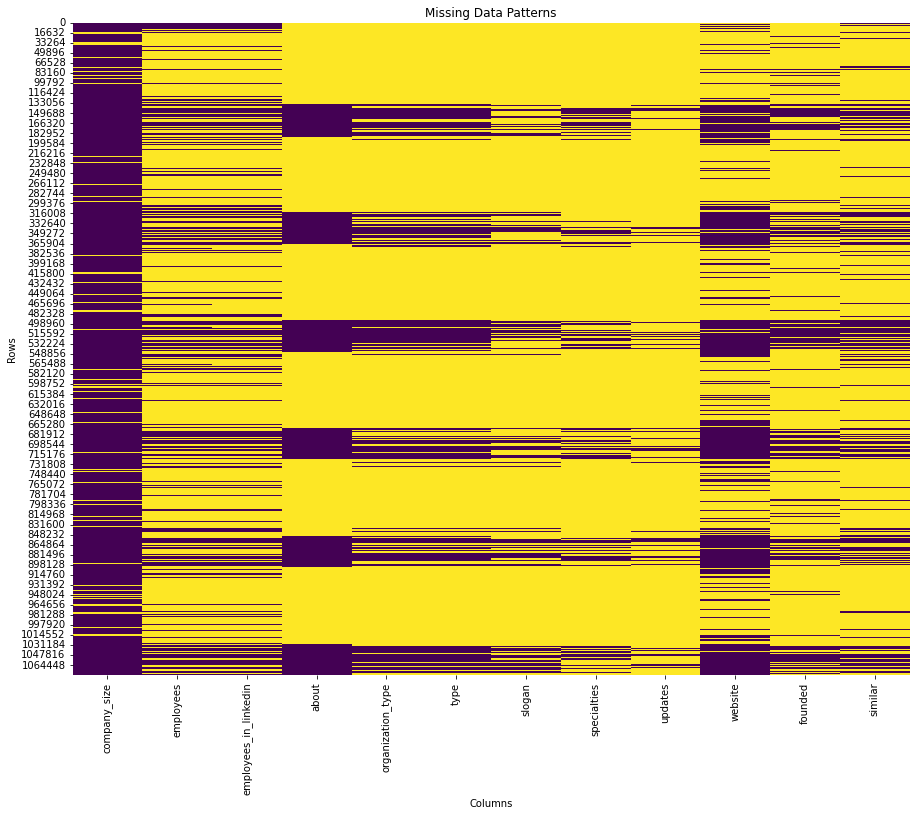

In [0]:
cookie = q2DF.select('company_size','employees','employees_in_linkedin', 'about', 'organization_type','type' , 'slogan','specialties','updates','website','founded', 'similar')

missing_data = cookie.select([missing_conditions[c].alias(c) for c in cookie.columns]).toPandas()

plt.figure(figsize=(15, 12))
sns.heatmap(missing_data, cmap='viridis', cbar=False)
plt.title('Missing Data Patterns')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

**We can conclude:**


- Columns 'updates' ,'slogan' and 'specialties' had very close patterns and the prediction model also helped us support the assumption that they their missingness mechanism might be MAR. 

- Columns 'employees' and 'employees_in_linkedin' derive from each other and thez have very close patterns but the prediction model did not strongly support the assumption that their missingness mechanism is MAR.
- Columns 'founded' ,'similar' had close patterns and the prediction model strongly supported the assumption that they their missingness mechanism is MAR. 
- The missingness mechanism of column 'website' might be MAR because the prediction model mildly supported that assumption
- Columns 'type' and 'organization_type' derive from each other so they are exactly the same, and the prediction model mildly supported the assumption that they their missingness mechanism is MAR.
- Column 'about' had a unique pattern , where it had its missing values at a fixed intervals as we can see in the heatmap , so its missingness mechanism might be MNAR because those missing values might be caused by unobserved data and factors. 
- **Lastly column 'company_size' had a very unique missing values pattern and from the results we got from the first method and the prediction model on this column, we can say that its missingness mechanism could be MCAR.**

### Evaluating Similarity 

#### Exploration :

Finding 2 examples of good and 2 examples of bad matches :

- We used the dataFrame that we built in question 1 , where we have the pairs of similar companies.
- First we extracted the 5 companies who have the most similar companies
- Then we decided to pick 'Black Rifle Coffee Company' and look at their similar companies

In [0]:
grouped_df = finalTable.groupBy("Company_A_id").agg(F.count("*").alias("row_count"))
dfx = grouped_df.orderBy(grouped_df["row_count"].desc())
#ordered_df.show(5, truncate = 50)

top_company_id = dfx.limit(4).collect()[3]["Company_A_id"]

our_picked_company = str(top_company_id) #Black Rifle Coffee Company

In [0]:
company_ids = [our_picked_company]
filtered_df = finalTable.filter(col("Company_A_id").isin(company_ids))

dx = filtered_df.orderBy(col("Company_A_name"), col("Company_B_name"))
#ordered_df=ordered_df.select("Company_A_name","Company_B_name","Company_A_industries","Company_B_industries","Company_A_headquarters","Company_B_headquarters","Company_A_specialties","Company_B_specialties" , "Company_A_company_size" , "Company_B_company_size")
display(dx)

company_A_about,company_A_affiliated,company_A_company_id,company_A_company_size,company_A_country_code,company_A_crunchbase_url,company_A_employees,company_A_employees_in_linkedin,company_A_followers,company_A_formatted_locations,company_A_founded,company_A_funding,company_A_headquarters,company_A_id,company_A_image,company_A_industries,company_A_investors,company_A_locations,company_A_logo,company_A_name,company_A_organization_type,company_A_slogan,company_A_specialties,company_A_sphere,company_A_stock_info,company_A_stock_timestamp,company_A_stock_type,company_A_updates,company_A_url,company_A_website,company_B_about,company_B_affiliated,company_B_company_id,company_B_company_size,company_B_country_code,company_B_crunchbase_url,company_B_employees,company_B_employees_in_linkedin,company_B_followers,company_B_formatted_locations,company_B_founded,company_B_funding,company_B_headquarters,company_B_id,company_B_image,company_B_industries,company_B_investors,company_B_locations,company_B_logo,company_B_name,company_B_organization_type,company_B_slogan,Company_B_specialties,company_B_sphere,company_B_stock_info,company_B_stock_timestamp,company_B_stock_type,company_B_updates,company_B_url,company_B_website
"America's Coffee Company. Veteran founded. BRCC specializes in roasting high quality, small batch coffees.","List(List(https://www.linkedin.com/showcase/black-rifle-coffee-podcast/?trk=affiliated-pages, Salt Lake City, Utah, Online Audio and Video Media, Black Rifle Coffee Podcast))",6978821,"501-1,000 employees",US,https://www.crunchbase.com/organization/black-rifle-coffee?utm_source=linkedin&utm_medium=referral&utm_campaign=linkedin_companies&utm_content=profile_cta_anon&trk=funding_crunchbase,"List(List(https://media.licdn.com/dms/image/C5603AQHEHZOz4Z5emw/profile-displayphoto-shrink_100_100/0/1653504681904?e=1698278400&v=beta&t=yFHmhVq8PBIyvcBb17twZqX2hK1QemfmoVTlLpSiQvU, https://www.linkedin.com/in/christopher-clark-6ba4121?trk=org-employees, Chief Technology Officer, Black Rifle Coffee Company, Christopher Clark), List(https://media.licdn.com/dms/image/D5603AQEO7wyqYQv6vA/profile-displayphoto-shrink_100_100/0/1692192707446?e=1698278400&v=beta&t=wwa-AVI0JMzMOx3Bck5Qr0tXgEhMI2vYLa3u5C-YFkY, https://www.linkedin.com/in/theresa-hoehne-a092352?trk=org-employees, null, Theresa Hoehne), List(https://media.licdn.com/dms/image/C5603AQEbjxXAEqZipg/profile-displayphoto-shrink_100_100/0/1516273584899?e=1698278400&v=beta&t=esh3I1LNqGFWFBIcAh5PCLmTeX_js3POizENO1tMXCc, https://www.linkedin.com/in/mcorley?trk=org-employees, null, Michael Corley, MBA, CPA), List(https://media.licdn.com/dms/image/C5603AQGEgM9OCGdz-g/profile-displayphoto-shrink_100_100/0/1516282211229?e=1698278400&v=beta&t=KVEvDMdla88JMUlDsFYOTeoBjLHzfdLCP6xOQYQJ6kw, https://www.linkedin.com/in/christopher-till-23a7542?trk=org-employees, Director, Internal Communications at Black Rifle Coffee Company, Christopher Till))",706,381300,"List(1144 S 500 W, Salt Lake City, UT 84101, US, San Antonio, Texas 78201, US, Manchester, TN 37355, US)",2014,"List(2022-06-27T00:00:00.000Z, Post IPO equity, 2)","Salt Lake City, UT",black-rifle-coffee-company,https://media.licdn.com/dms/image/D563DAQGOJCDlqLNJfA/image-scale_191_1128/0/1671237543095?e=1693425600&v=beta&t=t7R15agnHIO3NHv6h-2k7JVgSClxWAyladtSKvFRGxk,Food and Beverage Services,null,"List(1144 S 500 W Salt Lake City, UT 84101, US, San Antonio, Texas 78201, US, Manchester, TN 37355, US)",https://media.licdn.com/dms/image/C4E0BAQEJPpX7CMJrEw/company-logo_200_200/0/1613759085063?e=2147483647&v=beta&t=gr1qmwOXtfm6VLaEmL8tHAVPJwfefO411ASDI9hG-iM,Black Rifle Coffee Company,Public Company,Black Rifle Coffee Company is a veteran founded coffee company serving premium coffee to people who love America.,"Premium Coffee, Apparel, Speciality Coffee, Coffee mugs, Media, Ready To Drink, Retail, Veterans, Military, Customer Service, Podcast, Marketing, Content, and Culture",Food and Beverage Services,null,2023-08-23,Public Company,"List(List(5

2 Good Matches :

- Company_A called Black Rifle Coffe Company and Company_B called Heisphere Coffe Roasters, both are companies that produce Coffe
- Company_A called Black Rifle Coffe Company and Company_B called NuZee,Inc ,both are companies that produce Coffe

2 Bad Matches :

- Company_A called Black Rifle Coffe Company and Company_B called Mowbray & Son Plumbing & Heating, Inc., the first company is a company that produces and sells Coffe and the second company is a company that do construction , this is obviously a bad match
- Company_A called Black Rifle Coffe Company and Company_B called Carrera Realty Group LL, the first company is a company that produces and sells coffe and the second company is a Real Estate company, this is obviously a bad match

Strengths of the LinkedIn matching algorithm:
- Utilization of Relevant Features: The algorithm strategically employs data from pertinent columns, including "industry," "location," "type," and "slogan," to facilitate the identification and matching of companies with similar attributes.
- Integration of Supervised and Unsupervised Methods: The algorithm employs a sophisticated blend of both supervised and unsupervised methodologies, enhancing its capacity to discern patterns and correlations in the data for improved matching outcomes.

Weaknesses of the LinkedIn matching algorithm:
- Sensitivity to Data Quality: The algorithm demonstrates sensitivity to the presence of missing or inaccurate data, which can compromise the effectiveness of its matching capabilities.
- Incorporation of Uninformative Features: The algorithm's reliance on uninformative columns as features may result in suboptimal matching, as these features contribute insufficiently to the overall accuracy of the matching process.
- Limited Accuracy: The algorithm's overall accuracy is noted to be subpar, contributing to a higher incidence of mismatching, which may impact the reliability of the matching outcomes.

#### Reverse Engineering :

Exploration of the "About" Column and Word Distribution Analysis:

In this phase of the investigation, attention was directed towards analyzing a compelling column named "about," which encapsulates comprehensive textual descriptions of each company. The primary objective was to elucidate the distribution of words within this column, with a specific emphasis on identifying the most frequently occurring terms. To enhance the clarity of the analysis, an initial step involved the exclusion of stopwords, as they are considered uninformative. Furthermore, extraneous characters such as "&," "-", and others were systematically removed to streamline the dataset. The focus remained on extracting relevant words, providing valuable insights into the inner workings of the algorithm. This meticulous approach enabled a more profound understanding of the algorithmic processes at play within the context of the given dataset.

In [0]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StopWordsRemover
from pyspark.sql.functions import explode, split, col, regexp_replace

df=finalTable




filtered_df = df.filter(col("company_A_about").isNotNull())


tokenized_df = (
    filtered_df
    .select("company_A_about", split(regexp_replace(col("company_A_about"), "[^a-zA-Z0-9\\s]", ""), " ").alias("words"))
)


remover = StopWordsRemover(inputCol="words", outputCol="filtered_words")
filtered_df = remover.transform(tokenized_df).select("company_A_about", "filtered_words")


exploded_df = filtered_df.select("company_A_about", explode("filtered_words").alias("word"))


distribution_df = exploded_df.groupBy("word").count()
filtered_distribution_df = distribution_df.filter(col("word") != "")

ordered_distribution_df_A = filtered_distribution_df.orderBy("count", ascending=False)


ordered_distribution_df_A.show()


+----------+-----+
|      word|count|
+----------+-----+
|  services|22884|
|  business|19459|
|   clients|16393|
|   company|16115|
|   service|15036|
|   provide|14321|
|        us|14199|
|experience|13312|
|      work|13055|
|      help|12768|
|      team|12262|
|   quality|11949|
|  industry|11652|
| solutions|11643|
|  products|11248|
|     years|10963|
| community|10939|
|       one|10297|
|    people|10243|
| customers|10195|
+----------+-----+
only showing top 20 rows



In [0]:

from pyspark.ml.feature import StopWordsRemover
from pyspark.sql.functions import explode, split, col, regexp_replace

df=finalTable


filtered_df = df.filter(col("company_B_about").isNotNull())


tokenized_df = (
    filtered_df
    .select("company_B_about", split(regexp_replace(col("company_B_about"), "[^a-zA-Z0-9\\s]", ""), " ").alias("words"))
)


remover = StopWordsRemover(inputCol="words", outputCol="filtered_words")
filtered_df = remover.transform(tokenized_df).select("company_B_about", "filtered_words")


exploded_df = filtered_df.select("company_B_about", explode("filtered_words").alias("word"))


distribution_df = exploded_df.groupBy("word").count()
filtered_distribution_df = distribution_df.filter(col("word") != "")


ordered_distribution_df_B = filtered_distribution_df.orderBy("count", ascending=False)


ordered_distribution_df_B.show()


+----------+-----+
|      word|count|
+----------+-----+
|  services|23269|
|  business|19579|
|   clients|16948|
|   company|16540|
|   service|15077|
|   provide|14638|
|        us|14262|
|experience|13464|
|      help|13440|
|      work|13328|
|      team|12735|
|   quality|12275|
| solutions|11737|
|  industry|11635|
|  products|11289|
| community|11190|
|      care|10991|
|     years|10936|
|       one|10445|
|     needs|10218|
+----------+-----+
only showing top 20 rows



Analysis and Conclusion of Word Distribution in "About" Columns:

Following the meticulous process of filtering and word counting within the "about" column, the resultant datasets for both Company A and Company B were visually represented through a stacked bar table. The striking observation from the plotted data unveils a noteworthy similarity in the recurring words between the two companies. The almost identical patterns depicted in the plot strongly suggest a shared vocabulary within the "about" descriptions of both companies.

This compelling finding raises a significant inference: the LinkedIn matching algorithm assigns a relatively high weight to the "about" column as a feature. The substantial overlap in the word distribution across companies may explain the algorithm's propensity to prioritize this column, ultimately contributing to a higher incidence of mismatches. This conclusion underscores the importance of refining the algorithm's feature weighting mechanisms to better discern unique characteristics and reduce the likelihood of false positive matches.

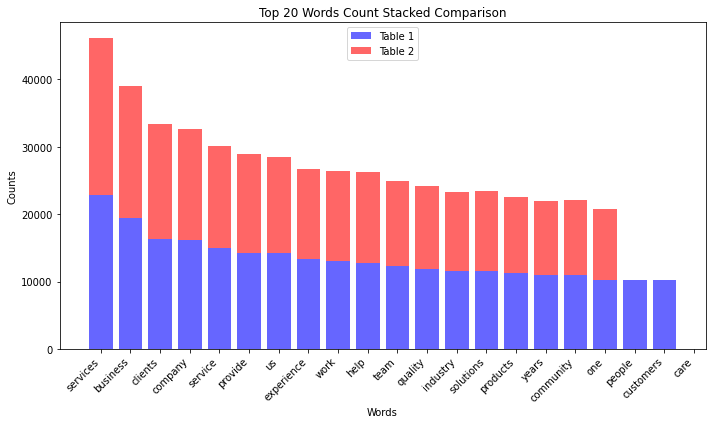

In [0]:
import matplotlib.pyplot as plt
import numpy as np




df1_pd = ordered_distribution_df_A.limit(20).toPandas()
df2_pd = ordered_distribution_df_B.limit(20).toPandas()

combined_df = pd.merge(df1_pd, df2_pd, on="word", how="outer", suffixes=('_table1', '_table2'))


plt.figure(figsize=(10, 6))


plt.bar(combined_df["word"], combined_df["count_table1"], color='blue', alpha=0.6, label='Table 1')
plt.bar(combined_df["word"], combined_df["count_table2"], color='red', alpha=0.6, bottom=combined_df["count_table1"], label='Table 2')

plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Top 20 Words Count Stacked Comparison')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


Analysis of Similarity in Informative and Uninformative Columns:

In this analytical segment, a comparative evaluation was conducted on both informative and uninformative columns for Company A and Company B. The assessment involved scrutinizing instances where the values in corresponding columns for both companies were equal (i.e., company_A_column == company_B_column). This approach aimed to quantify the presence of "similar" companies sharing common values in specific columns.

The findings yielded a compelling trend, notably a substantial concentration of similar companies within the same industry. This observation aligns cohesively with the overarching objective of the LinkedIn matching algorithm, which endeavors to pair companies with comparable attributes. The resultant insights bolster the hypothesis that the algorithm assigns considerable weights to informative columns, particularly those that are indicative of industry alignment.

Visual representation of the results through a bar plot further substantiates this conclusion. The informative columns in both Company A and Company B consistently exhibit identical values, underscoring their similarity. Conversely, the discernible differences in the counts between informative and uninformative columns emphasize the algorithm's discriminative capability in prioritizing relevant features for achieving accurate matching outcomes.

Number of times company_A_industries and company_B_industries are equal: 22385
Number of times company_A_sphere and company_B_sphere are equal: 22385
Number of times company_A_slogan and company_B_slogan are equal: 199
Number of times company_A_organization_type and company_B_organization_type are equal: 28857
Number of times company_A_headquarters and company_B_headquarters are equal: 5134
Number of times company_A_about and company_B_about are equal: 163
Number of times company_A_company_size and company_B_company_size are equal: 21745
Number of times company_A_followers and company_B_followers are equal: 1429
Number of times company_A_founded and company_B_founded are equal: 9521


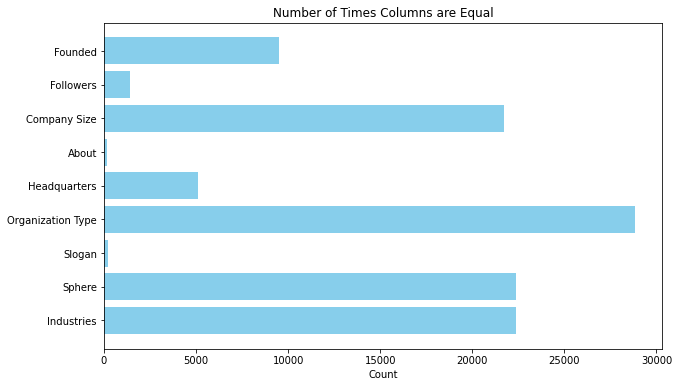

In [0]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

df=finalTable


count_same_industries = df.filter(col("company_A_industries") == col("company_B_industries")).count()
count_same_sphere = df.filter(col("company_A_sphere") == col("company_B_sphere")).count()
count_same_slogan = df.filter(col("company_A_slogan") == col("company_B_slogan")).count()
count_same_organization_type = df.filter(col("company_A_organization_type") == col("company_B_organization_type")).count()
count_same_headquarters = df.filter(col("company_A_headquarters") == col("company_B_headquarters")).count()
count_same_about = df.filter(col("company_A_about") == col("company_B_about")).count()
count_same_company_size = df.filter(col("company_A_company_size") == col("company_B_company_size")).count()
count_same_followers = df.filter(col("company_A_followers") == col("company_B_followers")).count()
count_same_founded = df.filter(col("company_A_founded") == col("company_B_founded")).count()



print(f"Number of times company_A_industries and company_B_industries are equal: {count_same_industries}")
print(f"Number of times company_A_sphere and company_B_sphere are equal: {count_same_sphere}")
print(f"Number of times company_A_slogan and company_B_slogan are equal: {count_same_slogan}")
print(f"Number of times company_A_organization_type and company_B_organization_type are equal: {count_same_organization_type}")
print(f"Number of times company_A_headquarters and company_B_headquarters are equal: {count_same_headquarters}")
print(f"Number of times company_A_about and company_B_about are equal: {count_same_about}")
print(f"Number of times company_A_company_size and company_B_company_size are equal: {count_same_company_size}")
print(f"Number of times company_A_followers and company_B_followers are equal: {count_same_followers}")
print(f"Number of times company_A_founded and company_B_founded are equal: {count_same_founded}")


categories = [
    "Industries",
    "Sphere",
    "Slogan",
    "Organization Type",
    "Headquarters",
    "About",
    "Company Size",
    "Followers",
    "Founded"
]

counts = [
    count_same_industries,
    count_same_sphere,
    count_same_slogan,
    count_same_organization_type,
    count_same_headquarters,
    count_same_about,
    count_same_company_size,
    count_same_followers,
    count_same_founded
]


plt.figure(figsize=(10, 6))
plt.barh(categories, counts, color='skyblue')
plt.xlabel('Count')
plt.title('Number of Times Columns are Equal')
plt.show()


Implementation of the Jaccard Algorithm for Similarity Measurement:

Subsequent to the preceding analysis, the focus shifted to the implementation of the Jaccard algorithm in the subsequent cells. The Jaccard algorithm, designed to gauge the similarity between words or very short sentences, was employed with the assumption that variations or adaptations of this algorithm might be integrated into the LinkedIn matching algorithm. The primary objective was to calculate the similarity of words or succinct sentences within informative columns, such as "industries" and "organization_type," contributing to the algorithm's ability to discern and match similar companies based on shared characteristics in these columns.

This assumption aligns with best practices in similarity measurement, as the Jaccard algorithm is well-suited for comparing sets and determining the degree of overlap. By applying this algorithm, it is hypothesized that the LinkedIn matching algorithm seeks to enhance its matching accuracy by quantifying the similarity of relevant features within informative columns. The subsequent findings and outcomes of the Jaccard algorithm implementation will provide further insights into the algorithmic mechanisms employed to refine matches based on shared attributes among companies.

In [0]:
#####################                   JACARD                  ###############################################

from pyspark.sql.functions import col, udf
from pyspark.sql.types import DoubleType

df=finalTable

df = df.na.fill("", subset=["company_A_industries"])
df = df.na.fill("", subset=["company_B_industries"])

def jaccard_similarity(str1, str2):
    set1 = set(str1.lower().split())
    set2 = set(str2.lower().split())
    
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    
    similarity = intersection / union if union != 0 else 0.0
    return similarity


jaccard_similarity_udf = udf(jaccard_similarity, DoubleType())

result_df = df.withColumn("industries_similarity", jaccard_similarity_udf(col("company_A_industries"), col("company_B_industries")))


result_df=result_df.select("company_A_name","company_B_name","company_A_industries","company_B_industries","industries_similarity")
result_df.show()


+--------------------+--------------------+--------------------+--------------------+---------------------+
|      company_A_name|      company_B_name|company_A_industries|company_B_industries|industries_similarity|
+--------------------+--------------------+--------------------+--------------------+---------------------+
|         BoneModels™|PLUS / modern nat...|Medical Equipment...|       Manufacturing|   0.3333333333333333|
|       1-800-BOARDUP|1-800-BoardUp Hou...|        Construction|        Construction|                  1.0|
|        10-8 Systems| 10-8 Technology INC|       Public Safety|       Public Safety|                  1.0|
|        816 New York|       898 Marketing|Business Consulti...|Advertising Services|                  0.2|
|22nd Century Tech...|   A&T Systems, Inc.|IT Services and I...|IT Services and I...|                  1.0|
|    A-1 Nursing Care|A1 NURSING SOLUTI...|Hospitals and Hea...|   Medical Practices|                  0.0|
|Asian Community D...|Common

In [0]:
#####################                   JACARD                  ###############################################

from pyspark.sql.functions import col, udf
from pyspark.sql.types import DoubleType

df=finalTable

df = df.na.fill("", subset=["company_A_organization_type"])
df = df.na.fill("", subset=["company_B_organization_type"])

def jaccard_similarity(str1, str2):
    set1 = set(str1.lower().split())
    set2 = set(str2.lower().split())
    
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    
    similarity = intersection / union if union != 0 else 0.0
    return similarity


jaccard_similarity_udf = udf(jaccard_similarity, DoubleType())


result_df = df.withColumn("organization_type_similarity", jaccard_similarity_udf(col("company_A_organization_type"), col("company_B_organization_type")))

result_df=result_df.select("company_A_name","company_B_name","company_A_organization_type","company_B_organization_type","organization_type_similarity")
result_df.show()


+--------------------+--------------------+---------------------------+---------------------------+----------------------------+
|      company_A_name|      company_B_name|company_A_organization_type|company_B_organization_type|organization_type_similarity|
+--------------------+--------------------+---------------------------+---------------------------+----------------------------+
|         BoneModels™|PLUS / modern nat...|             Privately Held|             Public Company|                         0.0|
|       1-800-BOARDUP|1-800-BoardUp Hou...|             Privately Held|                           |                         0.0|
|        10-8 Systems| 10-8 Technology INC|             Privately Held|             Privately Held|                         1.0|
|        816 New York|       898 Marketing|             Privately Held|             Public Company|                         0.0|
|22nd Century Tech...|   A&T Systems, Inc.|             Privately Held|             Privately Hel

Analysis of Missing Data and Sensitivity in Informative Columns:

Utilizing the code developed in Question 2, the investigation extended to quantify the percentage of missing data in each column. The results were captured in a list of tuples, revealing a significant revelation regarding the prevalence of missing values in columns crucial for the accurate matching of similar companies.

A noteworthy observation emerged, particularly in the "specialties" column, where a staggering 87.38% of data was found to be missing. This high percentage of missing values in a column recognized for its informativeness and criticality in the matching process suggests a potential contributing factor to the occurrence of mismatches. The sensitivity of the LinkedIn matching algorithm to missing data is underscored by these findings.

Further reinforcing this observation, the "organization_type" column exhibited a substantial 78.27% missing values percentage. This aligns coherently with the assumption made earlier about one of the weaknesses of the LinkedIn matching algorithm. The algorithm's susceptibility to missing data, particularly in columns integral to the matching process, accentuates the need for robust data imputation strategies or enhanced handling mechanisms to mitigate the impact of missing values on the algorithm's performance.

In [0]:
missing_data = [
    ("about", 71.17563968670822),
    ("affiliated", 99.19059199638866),
    ("company_id", 0.0),
    ("company_size", 7.067658183762443),
    ("country_code", 0.0),
    ("crunchbase_url", 99.4897491945234),
    ("employees", 70.19038201282657),
    ("employees_in_linkedin", 70.7587251870195),
    ("followers", 57.73271405141544),
    ("formatted_locations", 0.0),
    ("founded", 77.59105377521769),
    ("funding", 99.4897491945234),
    ("headquarters", 0.21460875067180865),
    ("id", 0.0),
    ("image", 0.0),
    ("industries", 0.0),
    ("investors", 99.77438330047907),
    ("locations", 0.0),
    ("logo", 0.0),
    ("name", 0.0),
    ("organization_type", 78.27308408500356),
    ("similar", 75.54348278551058),
    ("slogan", 86.23460621606847),
    ("specialties", 87.38415058874025),
    ("sphere", 0.0),
    ("stock_info", 99.986586953083),
    ("timestamp", 0.0),
    ("type", 78.27308408500356),
    ("updates", 93.1454705065599),
    ("url", 0.0),
    ("website", 57.15928316977125),
    ("meta_industry", 0.0)
]


for attribute, missing_percentage in missing_data:
    print(f"{attribute}: {missing_percentage} Missing Percentage")


about: 71.17563968670822 Missing Percentage
affiliated: 99.19059199638866 Missing Percentage
company_id: 0.0 Missing Percentage
company_size: 7.067658183762443 Missing Percentage
country_code: 0.0 Missing Percentage
crunchbase_url: 99.4897491945234 Missing Percentage
employees: 70.19038201282657 Missing Percentage
employees_in_linkedin: 70.7587251870195 Missing Percentage
followers: 57.73271405141544 Missing Percentage
formatted_locations: 0.0 Missing Percentage
founded: 77.59105377521769 Missing Percentage
funding: 99.4897491945234 Missing Percentage
headquarters: 0.21460875067180865 Missing Percentage
id: 0.0 Missing Percentage
image: 0.0 Missing Percentage
industries: 0.0 Missing Percentage
investors: 99.77438330047907 Missing Percentage
locations: 0.0 Missing Percentage
logo: 0.0 Missing Percentage
name: 0.0 Missing Percentage
organization_type: 78.27308408500356 Missing Percentage
similar: 75.54348278551058 Missing Percentage
slogan: 86.23460621606847 Missing Percentage
specialtie

Findings:

1. **Strengths of the LinkedIn Matching Algorithm:**
   - Effective Use of Relevant Features: The algorithm strategically utilizes pertinent features such as "industry," "location," "type," and "slogan" for matching similar companies.
   - Hybrid Methodology: Incorporation of both supervised and unsupervised methods enhances the algorithm's pattern recognition capabilities.

2. **Weaknesses of the LinkedIn Matching Algorithm:**
   - Sensitivity to Missing or Inaccurate Data: The algorithm exhibits sensitivity to data quality, particularly in the presence of missing or inaccurate information.
   - Reliance on Uninformative Features: The use of uninformative columns contributes to suboptimal matching outcomes.
   - Limited Accuracy: The overall accuracy of the algorithm is noted to be subpar, leading to a higher incidence of mismatches.

3. **Analysis of "About" Column:**
   - Word Distribution Similarity: Both Company A and Company B display remarkably similar word distribution patterns in their "about" descriptions, potentially contributing to the algorithm's tendency for mismatches.
   - High Weight on "About" Column: The algorithm assigns a relatively high weight to the "about" column as a feature, influencing matching outcomes.

4. **Analysis of Informative and Uninformative Columns:**
   - Industry Alignment: Similar companies tend to share values in informative columns, such as "industries," aligning with the algorithm's objective to match companies with comparable attributes.
   - Discriminative Capability: The algorithm demonstrates the ability to distinguish between informative and uninformative columns, emphasizing its discriminative power.

5. **Jaccard Algorithm Implementation:**
   - Similarity Measurement: The implementation of the Jaccard algorithm supports the hypothesis that the LinkedIn matching algorithm employs similar methodologies to calculate the similarity of words or short sentences in informative columns.

6. **Missing Data Analysis:**
   - Sensitivity to Missing Data: High percentages of missing values in critical columns, such as "specialties" and "organization_type," underscore the algorithm's sensitivity to missing data and its potential impact on mismatches.

**Overall Assessment:**
Considering the strengths and weaknesses identified, the LinkedIn matching algorithm exhibits notable capabilities in leveraging relevant features for matching similar companies. However, its sensitivity to data quality, especially in critical columns, poses challenges that may lead to a higher incidence of mismatches. To enhance algorithmic performance, addressing issues related to missing data, refining feature weighting mechanisms, and implementing improved accuracy measures are recommended.


###  Supervised Learning 

In [0]:
import sparknlp
from sparknlp.base import DocumentAssembler
from sparknlp.annotator import Tokenizer, Normalizer, LemmatizerModel
from pyspark.ml import Pipeline
from pyspark.sql.functions import col, count, when, isnan, desc
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number, first
from pyspark.ml.feature import Word2Vec
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import udf, col
from pyspark.sql.types import StringType, ArrayType, StructType, StructField
import json
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, CountVectorizer, IDF, StringIndexer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.sql.functions import col, when, concat_ws
from pyspark.ml.feature import HashingTF, IDF, VectorAssembler, StringIndexer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from sparknlp.base import DocumentAssembler
from sparknlp.annotator import Tokenizer, Normalizer, StopWordsCleaner
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.linalg import VectorUDT
from pyspark.sql.functions import array_contains, split
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col, when
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from sparknlp.pretrained import PretrainedPipeline
from pyspark.ml.feature import Word2Vec
import re
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf, col
from pyspark.sql.types import StringType


Feature Engineering - Create and Extract New Features 

In [0]:


ml_companies_dataframe = companies
ml_companies_dataframe = ml_companies_dataframe.filter(ml_companies_dataframe.sphere.isNotNull())


# Define the UDF
def map_to_meta_industry(industry):
    return meta_industries_12.get(industry, "Unknown")

map_to_meta_industry_udf = udf(map_to_meta_industry, StringType())

# Assuming there's an 'Industry' column to be mapped
ml_companies_dataframe = ml_companies_dataframe.withColumn("meta_industry", map_to_meta_industry_udf(col("sphere")))



After multiple runs on companies dataframe using SQL for further explorations of the data, especially the nested data in arrays. we decided to include text from updates, subtitle from similar, title from similar, subtitle from employees, subtitle from affiliated

In [0]:



# Define a UDF to extract the 'text' field from the JSON-like string
def extract_text_from_updates(updates):
    if not updates or updates == []:
        return None
    else:
        return ' '.join([update['text'] for update in updates if 'text' in update and update['text'] is not None])
    
def extract_subtitle_from_similar(similar):
    if not similar or similar == []:
        return None
    else:
        return ' '.join([similar['subtitle'] for similar in similar if 'subtitle' in similar and similar['subtitle'] is not None])


def extract_title_from_similar(similar):
    if not similar or similar == []:
        return None
    else:
        return ' '.join([similar['title'] for similar in similar if 'title' in similar and similar['title'] is not None])

def extract_subtitle_from_employees(employees):
    if not employees or employees == []:
        return None
    else:
        return ' '.join([employees['subtitle'] for employees in employees if 'subtitle' in employees and employees['subtitle'] is not None])
    

def extract_subtitle_from_affiliated(affiliated):
    if not affiliated or affiliated == []:
        return None
    else:
        return ' '.join([affiliated['subtitle'] for affiliated in affiliated if 'subtitle' in affiliated and affiliated['subtitle'] is not None])


       
    
extract_text_udf = udf(extract_text_from_updates, StringType())
extract_subtitle_similar_udf = udf(extract_subtitle_from_similar, StringType())
extract_title_similar_udf = udf(extract_subtitle_from_similar, StringType())
extract_subtitle_employees_udf = udf(extract_subtitle_from_employees, StringType())
extract_subtitle_affiliated_udf = udf(extract_subtitle_from_affiliated, StringType())

ml_companies_dataframe = ml_companies_dataframe.withColumn("updates_text", extract_text_udf(col("updates")))
ml_companies_dataframe = ml_companies_dataframe.withColumn("similar_subtitle", extract_subtitle_similar_udf(col("similar")))
ml_companies_dataframe = ml_companies_dataframe.withColumn("similar_title", extract_title_similar_udf(col("similar")))

ml_companies_dataframe = ml_companies_dataframe.withColumn("employees_subtitle", extract_subtitle_employees_udf(col("employees")))
ml_companies_dataframe = ml_companies_dataframe.withColumn("affiliated_subtitle", extract_subtitle_affiliated_udf(col("affiliated")))






We can see that these column can be informative and can further improve the model prediction as added features, the direct reason is that texts are related to the industry of the data

In [0]:
ml_companies_dataframe.where(col("updates_text").isNotNull() & 
    col("similar_subtitle").isNotNull() &
    col("similar_title").isNotNull() & 
    col("employees_subtitle").isNotNull() & 
    col("affiliated_subtitle").isNotNull()).select("updates_text", "similar_subtitle", "similar_title", "employees_subtitle", "affiliated_subtitle", "meta_industry").show(n=5, truncate=100, vertical=True)

-RECORD 0-------------------------------------------------------------------------------------------------------------------
 updates_text        | https://lnkd.in/eTaV289                                                                              
 similar_subtitle    | Individual and Family Services                                                                       
 similar_title       | Individual and Family Services                                                                       
 employees_subtitle  | Account Executive at E&ES Former Housing Counselor at DuPage Homeownership Center                    
 affiliated_subtitle |                                                                                                      
 meta_industry       | Services                                                                                             
-RECORD 1-------------------------------------------------------------------------------------------------------------------


In [0]:
#TEXT COLUMNS


text_columns = ["about", "slogan", "specialties", "name", "updates_text", "similar_subtitle", "similar_title", "employees_subtitle", "affiliated_subtitle"]

# FILL NULL VALUES



from pyspark.sql.functions import col

for colo in text_columns:
    # Count the total number of rows in the DataFrame
    total_rows = ml_companies_dataframe.count()

    # Count the number of null values in the specific column
    null_count = ml_companies_dataframe.filter(col(colo).isNull()).count()

    # Calculate the percentage of null values
    null_percentage = (null_count / total_rows) * 100

    print(f"Percentage of null values in {colo}: {null_percentage:.2f}%")




Percentage of null values in about: 71.18%
Percentage of null values in slogan: 86.23%
Percentage of null values in specialties: 87.38%
Percentage of null values in name: 0.00%
Percentage of null values in updates_text: 93.15%
Percentage of null values in similar_subtitle: 75.54%
Percentage of null values in similar_title: 75.54%
Percentage of null values in employees_subtitle: 70.19%
Percentage of null values in affiliated_subtitle: 99.19%


- The importance scores of features (words, in this case) used by the Random Forest model are extracted and linked back to the vocabulary from CountVectorizer, showing which words are most influential in making predictions.

- The output from the feature importance analysis gave us insights into which words significantly impact the model's predictions. we want to use this information to create new features (for each textual feature) that might improve your model's performance
- extracting feature importance is an effective and straightforward method to assess the importance of words (features) for making predictions. Random Forest inherently provides a measure of feature importance which is useful for understanding which features (in this case, words) contribute most to the model's decision-making process.

So we are doing this for each text feature

In [0]:



important_words_slogan_RF = []
# Replace null values with an empty string (or any placeholder string you prefer)
ml_companies_slogan = ml_companies_dataframe.withColumn('slogan', when(col('slogan').isNull(), "").otherwise(col('slogan')))


# Define column names
text_column = 'slogan'
target_column = 'meta_industry'

# 1. Preprocessing Steps
# Tokenize text
regexTokenizer = RegexTokenizer(inputCol=text_column, outputCol="words", pattern="\\W")

# Remove stopwords
remover = StopWordsRemover(inputCol="words", outputCol="filtered")

# Convert to TF words vector
cv = CountVectorizer(inputCol="filtered", outputCol="rawFeatures")

# Compute the IDF vector
idf = IDF(inputCol="rawFeatures", outputCol="features")

# 2. Convert 'meta_industry' to numeric labels
labelIndexer = StringIndexer(inputCol=target_column, outputCol="label")

# 3. Define the Random Forest model
rf = RandomForestClassifier(featuresCol="features", labelCol="label")

# Define the pipeline
pipeline = Pipeline(stages=[regexTokenizer, remover, cv, idf, labelIndexer, rf])

# Split the data into training and test sets
(trainingData, testData) = ml_companies_slogan.randomSplit([0.7, 0.3])

# Train the model
model = pipeline.fit(trainingData)

# Make predictions
predictions = model.transform(testData)

# Display example prediction results
predictions.select("prediction", "label", "features").show(5)

# Extract the Random Forest model from the pipeline model
rfModel = model.stages[-1]

# Feature importance
importances = rfModel.featureImportances

# Extract the vocabulary from CountVectorizerModel (adjust stage index accordingly)
cvModel = model.stages[2]  # Adjust the index based on your pipeline structure
vocabulary = cvModel.vocabulary

# Map feature importance scores back to words
wordImportance = [(vocabulary[i], importances[i]) for i in range(len(vocabulary))]

# Sort by importance
sortedWordImportance = sorted(wordImportance, key=lambda x: x[1], reverse=True)

# Display the most important features
print("Top 40 Features Slogan (RandomForest):")
for word, importance in sortedWordImportance[:40]:
    print(f"{word}: {importance}")
    important_words_slogan_RF.append(word)

print(important_words_slogan_RF)





+----------+-----+-------------+
|prediction|label|     features|
+----------+-----+-------------+
|       0.0|  5.0|(42005,[],[])|
|       0.0|  0.0|(42005,[],[])|
|       0.0|  7.0|(42005,[],[])|
|       0.0|  1.0|(42005,[],[])|
|       0.0|  3.0|(42005,[],[])|
+----------+-----+-------------+
only showing top 5 rows

Top 40 Features Slogan (RandomForest):
marketing: 0.04313278552495057
agency: 0.034949109802803274
financial: 0.033662171104381904
business: 0.03200811160131575
media: 0.03088177118784057
planning: 0.027787424491339165
brands: 0.023907401517074104
production: 0.023698870270190173
social: 0.02266221490225769
video: 0.022064867734448594
advertising: 0.02135505842926499
travel: 0.020558462208256478
law: 0.02052002948030451
stories: 0.020488104250243826
film: 0.019618949577412646
software: 0.019234847397631236
solutions: 0.018743518264625485
helping: 0.017489737946136806
since: 0.016564268929559738
let: 0.014881470593929566
cloud: 0.014863526995566746
automation: 0.01380719

In [0]:

important_words_about = []
# Replace null values with an empty string 
ml_companies_about = ml_companies_dataframe.withColumn('about', when(col('about').isNull(), "").otherwise(col('about')))


text_column = 'about'
target_column = 'meta_industry'

# 1. Preprocessing Steps
regexTokenizer = RegexTokenizer(inputCol=text_column, outputCol="words", pattern="\\W")

remover = StopWordsRemover(inputCol="words", outputCol="filtered")

cv = CountVectorizer(inputCol="filtered", outputCol="rawFeatures")

idf = IDF(inputCol="rawFeatures", outputCol="features")

labelIndexer = StringIndexer(inputCol=target_column, outputCol="label")

# 2. Define the Random Forest model
rf = RandomForestClassifier(featuresCol="features", labelCol="label")

pipeline = Pipeline(stages=[regexTokenizer, remover, cv, idf, labelIndexer, rf])

(trainingData, testData) = ml_companies_about.randomSplit([0.7, 0.3])

model = pipeline.fit(trainingData)

predictions = model.transform(testData)

predictions.select("prediction", "label", "features").show(5)

rfModel = model.stages[-1]

# Feature importance
importances = rfModel.featureImportances

# Extract the vocabulary from CountVectorizerModel (adjust stage index accordingly)
cvModel = model.stages[2]  # Adjust the index based on your pipeline structure
vocabulary = cvModel.vocabulary

# Map feature importance scores back to words
wordImportance = [(vocabulary[i], importances[i]) for i in range(len(vocabulary))]

# Sort by importance
sortedWordImportance = sorted(wordImportance, key=lambda x: x[1], reverse=True)

# Display the most important features
print("Top 20 Features in about:")
for word, importance in sortedWordImportance[:20]:
    print(f"{word}: {importance}")
    important_words_about.append(word)

print(important_words_about)


+----------+-----+--------------+
|prediction|label|      features|
+----------+-----+--------------+
|       0.0|  2.0|(206705,[],[])|
|       0.0|  3.0|(206705,[],[])|
|       0.0|  1.0|(206705,[],[])|
|       0.0| 11.0|(206705,[],[])|
|       0.0|  6.0|(206705,[],[])|
+----------+-----+--------------+
only showing top 5 rows

Top 20 Features in about:
digital: 0.0470321797344227
music: 0.028631356885864507
help: 0.02806336103838432
world: 0.02528851575418269
new: 0.02499507147968084
technologies: 0.023369778469781267
production: 0.022879228109312272
coaching: 0.022878974437007062
automation: 0.02025850309416916
community: 0.01984887868830799
consulting: 0.019591875425804484
expertise: 0.018208495494016038
support: 0.01699238236449437
com: 0.016934009184792917
companies: 0.01640757079801318
provides: 0.016024103793684175
day: 0.015218197131529382
organizations: 0.015152151334819133
properties: 0.01399913549438883
realty: 0.013943792690636444
['digital', 'music', 'help', 'world', 'new

In [0]:

important_words_specialties = []
# Replace null values with an empty string 
ml_companies_specialties = ml_companies_dataframe.withColumn('specialties', when(col('specialties').isNull(), "").otherwise(col('specialties')))


text_column = 'specialties'
target_column = 'meta_industry'

# 1. Preprocessing Steps
regexTokenizer = RegexTokenizer(inputCol=text_column, outputCol="words", pattern="\\W")

remover = StopWordsRemover(inputCol="words", outputCol="filtered")

cv = CountVectorizer(inputCol="filtered", outputCol="rawFeatures")

idf = IDF(inputCol="rawFeatures", outputCol="features")

labelIndexer = StringIndexer(inputCol=target_column, outputCol="label")

# 2. Define the Random Forest model
rf = RandomForestClassifier(featuresCol="features", labelCol="label")

pipeline = Pipeline(stages=[regexTokenizer, remover, cv, idf, labelIndexer, rf])

(trainingData, testData) = ml_companies_specialties.randomSplit([0.7, 0.3])

model = pipeline.fit(trainingData)

predictions = model.transform(testData)

predictions.select("prediction", "label", "features").show(5)

rfModel = model.stages[-1]

# Feature importance
importances = rfModel.featureImportances

# Extract the vocabulary from CountVectorizerModel (adjust stage index accordingly)
cvModel = model.stages[2]  # Adjust the index based on your pipeline structure
vocabulary = cvModel.vocabulary

# Map feature importance scores back to words
wordImportance = [(vocabulary[i], importances[i]) for i in range(len(vocabulary))]

# Sort by importance
sortedWordImportance = sorted(wordImportance, key=lambda x: x[1], reverse=True)

# Display the most important features
print("Top 50 Features in specialties:")
for word, importance in sortedWordImportance[:50]:
    print(f"{word}: {importance}")
    important_words_specialties.append(word)

print(important_words_specialties)


+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       0.0|  3.0|       (47134,[],[])|
|       0.0|  7.0|       (47134,[],[])|
|       0.0|  3.0|       (47134,[],[])|
|       0.0|  7.0|       (47134,[],[])|
|       0.0|  1.0|(47134,[113,736,9...|
+----------+-----+--------------------+
only showing top 5 rows

Top 50 Features in specialties:
advertising: 0.06576660528267111
marketing: 0.03974546092993146
ads: 0.033254269676347877
graphic: 0.030365316593558345
search: 0.027658472212388197
videography: 0.026145026956209683
digital: 0.02597773331165289
seo: 0.02378898401976645
training: 0.022262732825132383
project: 0.021251963907678646
enterprise: 0.0202151584676399
technology: 0.020167989467327743
mobile: 0.01893618024321241
consulting: 0.018206316279181442
intelligence: 0.01804085019632076
solutions: 0.017776178669669396
lead: 0.016122122536299684
litigation: 0.015753055893179234
cloud: 0.015681100810659158
insura

In [0]:

important_words_updates_text = []
# Replace null values with an empty string
ml_companies_updates_text = ml_companies_dataframe.withColumn('updates_text', when(col('updates_text').isNull(), "").otherwise(col('updates_text')))


text_column = 'updates_text'
target_column = 'meta_industry'

# 1. Preprocessing Steps
regexTokenizer = RegexTokenizer(inputCol=text_column, outputCol="words", pattern="\\W")

remover = StopWordsRemover(inputCol="words", outputCol="filtered")

cv = CountVectorizer(inputCol="filtered", outputCol="rawFeatures")

idf = IDF(inputCol="rawFeatures", outputCol="features")

labelIndexer = StringIndexer(inputCol=target_column, outputCol="label")

# 2. Define the Random Forest model
rf = RandomForestClassifier(featuresCol="features", labelCol="label")

pipeline = Pipeline(stages=[regexTokenizer, remover, cv, idf, labelIndexer, rf])

(trainingData, testData) = ml_companies_updates_text.randomSplit([0.7, 0.3])

model = pipeline.fit(trainingData)

predictions = model.transform(testData)

predictions.select("prediction", "label", "features").show(5)

rfModel = model.stages[-1]

# Feature importance
importances = rfModel.featureImportances

# Extract the vocabulary from CountVectorizerModel (adjust stage index accordingly)
cvModel = model.stages[2]  # Adjust the index based on your pipeline structure
vocabulary = cvModel.vocabulary

# Map feature importance scores back to words
wordImportance = [(vocabulary[i], importances[i]) for i in range(len(vocabulary))]

# Sort by importance
sortedWordImportance = sorted(wordImportance, key=lambda x: x[1], reverse=True)

# Display the most important features
print("Top 20 Features in updates_text:")
for word, importance in sortedWordImportance[:20]:
    print(f"{word}: {importance}")
    important_words_updates_text.append(word)

print(important_words_updates_text)


+----------+-----+--------------+
|prediction|label|      features|
+----------+-----+--------------+
|       0.0|  7.0|(262144,[],[])|
|       0.0|  7.0|(262144,[],[])|
|       0.0|  1.0|(262144,[],[])|
|       0.0|  6.0|(262144,[],[])|
|       0.0|  0.0|(262144,[],[])|
+----------+-----+--------------+
only showing top 5 rows

Top 20 Features in updates_text:
help: 0.051534672508524254
social: 0.02588400948115198
bring: 0.020871450134837658
please: 0.020204956753905746
students: 0.019365062190767075
customers: 0.01819276457352197
people: 0.017888290012014585
latest: 0.01741950145035827
software: 0.016917315791152358
skills: 0.016539205453447073
information: 0.016331568506997924
ai: 0.01564875123426978
services: 0.015508890660124708
customer: 0.014747480177276794
client: 0.014473819011735738
around: 0.014443439130118516
service: 0.013946923659551531
build: 0.013741153995759686
level: 0.013493429671382468
cybersecurity: 0.013431779276991932
['help', 'social', 'bring', 'please', 'studen

In [0]:



important_words_similar_subtitle_RF = []
# Replace null values with an empty string (or any placeholder string you prefer)
ml_companies_similar_subtitle = ml_companies_dataframe.withColumn('similar_subtitle', when(col('similar_subtitle').isNull(), "").otherwise(col('similar_subtitle')))


# Define column names
text_column = 'similar_subtitle'
target_column = 'meta_industry'

# 1. Preprocessing Steps
# Tokenize text
regexTokenizer = RegexTokenizer(inputCol=text_column, outputCol="words", pattern="\\W")

# Remove stopwords
remover = StopWordsRemover(inputCol="words", outputCol="filtered")

# Convert to TF words vector
cv = CountVectorizer(inputCol="filtered", outputCol="rawFeatures")

# Compute the IDF vector
idf = IDF(inputCol="rawFeatures", outputCol="features")

# 2. Convert 'meta_industry' to numeric labels
labelIndexer = StringIndexer(inputCol=target_column, outputCol="label")

# 3. Define the Random Forest model
rf = RandomForestClassifier(featuresCol="features", labelCol="label")

# Define the pipeline
pipeline = Pipeline(stages=[regexTokenizer, remover, cv, idf, labelIndexer, rf])

# Split the data into training and test sets
(trainingData, testData) = ml_companies_similar_subtitle.randomSplit([0.7, 0.3])

# Train the model
model = pipeline.fit(trainingData)

# Make predictions
predictions = model.transform(testData)

# Display example prediction results
predictions.select("prediction", "label", "features").show(5)

# Extract the Random Forest model from the pipeline model
rfModel = model.stages[-1]

# Feature importance
importances = rfModel.featureImportances

# Extract the vocabulary from CountVectorizerModel (adjust stage index accordingly)
cvModel = model.stages[2]  # Adjust the index based on your pipeline structure
vocabulary = cvModel.vocabulary

# Map feature importance scores back to words
wordImportance = [(vocabulary[i], importances[i]) for i in range(len(vocabulary))]

# Sort by importance
sortedWordImportance = sorted(wordImportance, key=lambda x: x[1], reverse=True)

# Display the most important features
print("Top 80 Features similar_subtitle (RandomForest):")
for word, importance in sortedWordImportance[:80]:
    print(f"{word}: {importance}")
    important_words_similar_subtitle_RF.append(word)

print(important_words_similar_subtitle_RF)





+----------+-----+-----------+
|prediction|label|   features|
+----------+-----+-----------+
|       0.0|  3.0|(235,[],[])|
|       0.0|  2.0|(235,[],[])|
|       0.0|  9.0|(235,[],[])|
|       0.0|  3.0|(235,[],[])|
|       0.0|  6.0|(235,[],[])|
+----------+-----+-----------+
only showing top 5 rows

Top 80 Features similar_subtitle (RandomForest):
services: 0.1389633609051724
construction: 0.08596510611325073
software: 0.08103897336785296
advertising: 0.06812888080439619
manufacturing: 0.057305352247133644
real: 0.05550616536599236
estate: 0.05065646321276042
development: 0.04731315876559473
organizations: 0.03950501544399665
retail: 0.031723722042146935
consulting: 0.031695958989697785
health: 0.029070782731492047
providers: 0.023231607650361148
practice: 0.021275081130541263
machinery: 0.021037412709408624
entertainment: 0.019626522706460984
hospitals: 0.017794284602488514
media: 0.015401588285636706
beverage: 0.014678153732141106
education: 0.014062600644568378
transportation: 0.

In [0]:



important_words_similar_title_RF = []
# Replace null values with an empty string (or any placeholder string you prefer)
ml_companies_similar_title = ml_companies_dataframe.withColumn('similar_title', when(col('similar_title').isNull(), "").otherwise(col('similar_title')))


# Define column names
text_column = 'similar_title'
target_column = 'meta_industry'

# 1. Preprocessing Steps
# Tokenize text
regexTokenizer = RegexTokenizer(inputCol=text_column, outputCol="words", pattern="\\W")

# Remove stopwords
remover = StopWordsRemover(inputCol="words", outputCol="filtered")

# Convert to TF words vector
cv = CountVectorizer(inputCol="filtered", outputCol="rawFeatures")

# Compute the IDF vector
idf = IDF(inputCol="rawFeatures", outputCol="features")

# 2. Convert 'meta_industry' to numeric labels
labelIndexer = StringIndexer(inputCol=target_column, outputCol="label")

# 3. Define the Random Forest model
rf = RandomForestClassifier(featuresCol="features", labelCol="label")

# Define the pipeline
pipeline = Pipeline(stages=[regexTokenizer, remover, cv, idf, labelIndexer, rf])

# Split the data into training and test sets
(trainingData, testData) = ml_companies_similar_title.randomSplit([0.7, 0.3])

# Train the model
model = pipeline.fit(trainingData)

# Make predictions
predictions = model.transform(testData)

# Display example prediction results
predictions.select("prediction", "label", "features").show(5)

# Extract the Random Forest model from the pipeline model
rfModel = model.stages[-1]

# Feature importance
importances = rfModel.featureImportances

# Extract the vocabulary from CountVectorizerModel (adjust stage index accordingly)
cvModel = model.stages[2]  # Adjust the index based on your pipeline structure
vocabulary = cvModel.vocabulary

# Map feature importance scores back to words
wordImportance = [(vocabulary[i], importances[i]) for i in range(len(vocabulary))]

# Sort by importance
sortedWordImportance = sorted(wordImportance, key=lambda x: x[1], reverse=True)

# Display the most important features
print("Top 20 Features similar_title (RandomForest):")
for word, importance in sortedWordImportance[:20]:
    print(f"{word}: {importance}")
    important_words_similar_title_RF.append(word)

print(important_words_similar_title_RF)





+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       0.0|  3.0|         (235,[],[])|
|       0.0|  9.0|         (235,[],[])|
|       1.0| 11.0|(235,[0,7,11,13,1...|
|       1.0|  6.0|(235,[0,2,3,5,30,...|
|       0.0|  2.0|(235,[1,123,124],...|
+----------+-----+--------------------+
only showing top 5 rows

Top 20 Features similar_title (RandomForest):
services: 0.17124993281029047
construction: 0.11664937086823546
software: 0.0724516289632
manufacturing: 0.060681509205738914
development: 0.05703958996932356
estate: 0.04840608497647139
non: 0.047562040728428207
health: 0.03371537196941277
retail: 0.03038287552923547
providers: 0.029226032848935702
advertising: 0.02337164193808089
hospitals: 0.02214170668007799
practice: 0.020091426881765476
care: 0.017891682695171756
consulting: 0.016782211384689286
financial: 0.016424381696637163
transportation: 0.016009199852776695
organizations: 0.015621903895211117
real: 0.

In [0]:



important_words_employees_subtitle_RF = []
# Replace null values with an empty string (or any placeholder string you prefer)
ml_companies_employees_subtitle = ml_companies_dataframe.withColumn('employees_subtitle', when(col('employees_subtitle').isNull(), "").otherwise(col('employees_subtitle')))


# Define column names
text_column = 'employees_subtitle'
target_column = 'meta_industry'

# 1. Preprocessing Steps
# Tokenize text
regexTokenizer = RegexTokenizer(inputCol=text_column, outputCol="words", pattern="\\W")

# Remove stopwords
remover = StopWordsRemover(inputCol="words", outputCol="filtered")

# Convert to TF words vector
cv = CountVectorizer(inputCol="filtered", outputCol="rawFeatures")

# Compute the IDF vector
idf = IDF(inputCol="rawFeatures", outputCol="features")

# 2. Convert 'meta_industry' to numeric labels
labelIndexer = StringIndexer(inputCol=target_column, outputCol="label")

# 3. Define the Random Forest model
rf = RandomForestClassifier(featuresCol="features", labelCol="label")

# Define the pipeline
pipeline = Pipeline(stages=[regexTokenizer, remover, cv, idf, labelIndexer, rf])

# Split the data into training and test sets
(trainingData, testData) = ml_companies_employees_subtitle.randomSplit([0.7, 0.3])

# Train the model
model = pipeline.fit(trainingData)

# Make predictions
predictions = model.transform(testData)

# Display example prediction results
predictions.select("prediction", "label", "features").show(5)

# Extract the Random Forest model from the pipeline model
rfModel = model.stages[-1]

# Feature importance
importances = rfModel.featureImportances

# Extract the vocabulary from CountVectorizerModel (adjust stage index accordingly)
cvModel = model.stages[2]  # Adjust the index based on your pipeline structure
vocabulary = cvModel.vocabulary

# Map feature importance scores back to words
wordImportance = [(vocabulary[i], importances[i]) for i in range(len(vocabulary))]

# Sort by importance
sortedWordImportance = sorted(wordImportance, key=lambda x: x[1], reverse=True)

# Display the most important features
print("Top 100 Features employees_subtitle (RandomForest):")
for word, importance in sortedWordImportance[:100]:
    print(f"{word}: {importance}")
    important_words_employees_subtitle_RF.append(word)

print(important_words_employees_subtitle_RF)





+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       0.0|  2.0|      (124532,[],[])|
|       0.0|  9.0|(124532,[68,1061,...|
|       0.0|  7.0|      (124532,[],[])|
|       0.0|  3.0|(124532,[1,6,7,46...|
|       1.0|  7.0|(124532,[0,2,20,2...|
+----------+-----+--------------------+
only showing top 5 rows

Top 100 Features employees_subtitle (RandomForest):
inc: 0.06079090473278977
bar: 0.03655369819723536
real: 0.03411427947465499
elementary: 0.02991688816210959
llc: 0.02919373582591664
commercial: 0.029007639128614367
attorney: 0.028884275138650228
company: 0.027270357018865266
operations: 0.024318631627251848
vice: 0.022988901953805162
video: 0.022935378886308363
sales: 0.021383634569347918
building: 0.021038392712710473
medical: 0.020054814395341302
architects: 0.0199997363700116
management: 0.01849419612480362
architect: 0.018026759891216916
club: 0.01739500722393433
litigation: 0.016897125329957005
sr: 0

In [0]:



important_words_affiliated_subtitle_RF = []
# Replace null values with an empty string (or any placeholder string you prefer)
ml_companies_affiliated_subtitle = ml_companies_dataframe.withColumn('affiliated_subtitle', when(col('affiliated_subtitle').isNull(), "").otherwise(col('affiliated_subtitle')))


# Define column names
text_column = 'affiliated_subtitle'
target_column = 'meta_industry'

# 1. Preprocessing Steps
# Tokenize text
regexTokenizer = RegexTokenizer(inputCol=text_column, outputCol="words", pattern="\\W")

# Remove stopwords
remover = StopWordsRemover(inputCol="words", outputCol="filtered")

# Convert to TF words vector
cv = CountVectorizer(inputCol="filtered", outputCol="rawFeatures")

# Compute the IDF vector
idf = IDF(inputCol="rawFeatures", outputCol="features")

# 2. Convert 'meta_industry' to numeric labels
labelIndexer = StringIndexer(inputCol=target_column, outputCol="label")

# 3. Define the Random Forest model
rf = RandomForestClassifier(featuresCol="features", labelCol="label")

# Define the pipeline
pipeline = Pipeline(stages=[regexTokenizer, remover, cv, idf, labelIndexer, rf])

# Split the data into training and test sets
(trainingData, testData) = ml_companies_affiliated_subtitle.randomSplit([0.7, 0.3])

# Train the model
model = pipeline.fit(trainingData)

# Make predictions
predictions = model.transform(testData)

# Display example prediction results
predictions.select("prediction", "label", "features").show(5)

# Extract the Random Forest model from the pipeline model
rfModel = model.stages[-1]

# Feature importance
importances = rfModel.featureImportances

# Extract the vocabulary from CountVectorizerModel (adjust stage index accordingly)
cvModel = model.stages[2]  # Adjust the index based on your pipeline structure
vocabulary = cvModel.vocabulary

# Map feature importance scores back to words
wordImportance = [(vocabulary[i], importances[i]) for i in range(len(vocabulary))]

# Sort by importance
sortedWordImportance = sorted(wordImportance, key=lambda x: x[1], reverse=True)

# Display the most important features
print("Top 50 Features affiliated_subtitle (RandomForest):")
for word, importance in sortedWordImportance[:50]:
    print(f"{word}: {importance}")
    important_words_affiliated_subtitle_RF.append(word)

print(important_words_affiliated_subtitle_RF)





+----------+-----+-----------+
|prediction|label|   features|
+----------+-----+-----------+
|       0.0|  3.0|(229,[],[])|
|       0.0|  2.0|(229,[],[])|
|       0.0|  9.0|(229,[],[])|
|       0.0|  7.0|(229,[],[])|
|       0.0|  5.0|(229,[],[])|
+----------+-----+-----------+
only showing top 5 rows

Top 50 Features affiliated_subtitle (RandomForest):
development: 0.13014911785283717
advertising: 0.11843568055011948
education: 0.09329894993972424
software: 0.08533657121697062
services: 0.08217707931360982
real: 0.05351128826695335
consulting: 0.05186076696248608
manufacturing: 0.045272705079420175
higher: 0.03837924069023653
estate: 0.03599301917575034
construction: 0.03053889695055979
health: 0.022265367725409012
care: 0.021678641369513484
providers: 0.02016574192397631
profit: 0.017620527690943574
media: 0.01714308195221822
vehicle: 0.0157891743125323
organizations: 0.012871893303593424
transportation: 0.008648577736778634
motor: 0.007656911292666967
hospitals: 0.007110895649476108

We took a number of the important words from each feature as explained above and stored them in an array and that for using them in order to generate new text features using this idea : for each feature, we store the important words in an array token from the above analysis output and printed in the below cell, we assume the existence of an important words in the text value of the feature represent the text better for making prediction and less noise data

In [0]:



def remove_numbers_from_array(array):
  
    cleaned_array = [element for element in array if not re.search(r'\d+', element)]
    return cleaned_array

remove_numbers_from_array_udf = udf(remove_numbers_from_array, ArrayType(StringType()))


text_column = "slogan"
output_column = "slogan_cleaned"
after_column = "slogan_important"

ml_companies_dataframe = ml_companies_dataframe.withColumn(text_column, when(col(text_column).isNull(), "").otherwise(col(text_column)))

regexTokenizer = RegexTokenizer(inputCol=text_column, outputCol="words", pattern="\\W")

# Remove stopwords
remover = StopWordsRemover(inputCol="words", outputCol=output_column)

# Define the pipeline
pipeline = Pipeline(stages=[regexTokenizer, remover])
# Train the model
model = pipeline.fit(ml_companies_dataframe)

# Apply the preprocessing model to the data
transformed_df = model.transform(ml_companies_dataframe)

important_words_1 = ['marketing', 'agency', 'financial', 'business', 'media', 'planning', 'brands', 'production', 'social', 'video', 'advertising', 'travel', 'law', 'stories', 'film', 'software', 'solutions', 'helping', 'cloud', 'automation', 'make', 'platform', 'new', 'family', 'litigation', 'insurance', 'companies', 'college', 'world', 'clients', 'strategic', 'branding', 'news', 'art', 'parts', 'providing', 'management', 'school']

def select_important_word(slogan_cleaned):
    # Find matching important words, preserving the order of importance
    matching_important_words = [word for word in important_words_1 if word in slogan_cleaned]
    
    # Select the most important one if multiple are found, else use a placeholder
    if len(matching_important_words) > 0:
        return matching_important_words # The first one is the most important due to sorting
    else:
        # Placeholder strategy: return a predefined string
        return slogan_cleaned

# Register the UDF
select_important_word_udf = udf(select_important_word, StringType())

transformed_df = transformed_df.withColumn(after_column, select_important_word_udf(transformed_df[output_column]))
transformed_df = transformed_df.withColumn(after_column, remove_numbers_from_array_udf(col(after_column)))
# transformed_df = transformed_df.withColumn(after_column, split(col(after_column), " "))
# AFTER THIS WE HAVE DF WITH slogan_important CLEANED AND TRANSFORMED 




text_column = "about"
output_column = "about_cleaned"
after_column = "about_important"
word = "words1"

transformed_df = transformed_df.withColumn(text_column, when(col(text_column).isNull(), "").otherwise(col(text_column)))

regexTokenizer = RegexTokenizer(inputCol=text_column, outputCol=word, pattern="\\W")

# Remove stopwords
remover = StopWordsRemover(inputCol=word, outputCol=output_column)

# Define the pipeline
pipeline = Pipeline(stages=[regexTokenizer, remover])
# Train the model
model = pipeline.fit(transformed_df)

# Apply the preprocessing model to the data
transformed_df = model.transform(transformed_df)

important_words_2 = ['digital', 'music', 'help', 'world', 'new', 'technologies', 'production', 'coaching', 'automation', 'community', 'consulting', 'expertise', 'support', 'com', 'companies', 'provides', 'day', 'organizations', 'properties', 'realty']

def select_important_word(about_cleaned):
    # Find matching important words, preserving the order of importance
    matching_important_words = [word for word in important_words_2 if word in about_cleaned]
    
    # Select the most important one if multiple are found, else use a placeholder
    if len(matching_important_words) > 0:
        return matching_important_words # The first one is the most important due to sorting
    else:
        # Placeholder strategy: return a predefined string
        return about_cleaned

# Register the UDF
select_important_word_udf = udf(select_important_word, StringType())

transformed_df = transformed_df.withColumn(after_column, select_important_word_udf(transformed_df[output_column]))
transformed_df = transformed_df.withColumn(after_column, remove_numbers_from_array_udf(col(after_column)))
# transformed_df = transformed_df.withColumn(after_column, split(col(after_column), " "))
# AFTER THIS WE HAVE DF WITH about_important CLEANED AND TRANSFORMED 




text_column = "specialties"
output_column = "specialties_cleaned"
after_column = "specialties_important"
word = "words2"


transformed_df = transformed_df.withColumn(text_column, when(col(text_column).isNull(), "").otherwise(col(text_column)))

regexTokenizer = RegexTokenizer(inputCol=text_column, outputCol=word, pattern="\\W")

# Remove stopwords
remover = StopWordsRemover(inputCol=word, outputCol=output_column)

# Define the pipeline
pipeline = Pipeline(stages=[regexTokenizer, remover])
# Train the model
model = pipeline.fit(transformed_df)

# Apply the preprocessing model to the data
transformed_df = model.transform(transformed_df)

important_words_3 = ['advertising', 'marketing', 'ads', 'graphic', 'search', 'videography', 'digital', 'training', 'project', 'enterprise', 'technology', 'mobile', 'consulting', 'intelligence', 'solutions', 'lead', 'litigation', 'cloud', 'insurance', 'support', 'computer', 'construction', 'generation', 'events', 'property', 'systems', 'information', 'siding', 'bookkeeping', 'wrongful', 'strategic', 'user', 'criminal', 'architecture', 'virus', 'networking', 'reputation', 'communications', 'team', 'home', 'career', 'ecommerce', 'internet', 'staffing', 'research', 'phone', 'identity', 'roofing', 'blockchain']

def select_important_word(specialties_cleaned):
    # Find matching important words, preserving the order of importance
    matching_important_words = [word for word in important_words_3 if word in specialties_cleaned]
    
    # Select the most important one if multiple are found, else use a placeholder
    if len(matching_important_words) > 0:
        return matching_important_words # The first one is the most important due to sorting
    else:
        # Placeholder strategy: return a predefined string
        return specialties_cleaned

# Register the UDF
select_important_word_udf = udf(select_important_word, StringType())

transformed_df = transformed_df.withColumn(after_column, select_important_word_udf(transformed_df[output_column]))
transformed_df = transformed_df.withColumn(after_column, remove_numbers_from_array_udf(col(after_column)))


combined_text_SAS = concat_ws(" ",
                          when(col("about").isNull(), "").otherwise(col("about")),
                          when(col("slogan").isNull(), "").otherwise(col("slogan")),
                          when(col("specialties").isNull(), "").otherwise(col("specialties")),
                          when(col("name").isNull(), "").otherwise(col("name")) ).alias("combined_text_SAS")

transformed_df = transformed_df.withColumn("combined_text_SAS", combined_text_SAS)






text_column = "combined_text_SAS"
output_column = "combined_text_SAS_cleaned"
after_column = "combined_text_SAS_important"
word = "words3"


transformed_df = transformed_df.withColumn(text_column, when(col(text_column).isNull(), "").otherwise(col(text_column)))

regexTokenizer = RegexTokenizer(inputCol=text_column, outputCol=word, pattern="\\W")

# Remove stopwords
remover = StopWordsRemover(inputCol=word, outputCol=output_column)

# Define the pipeline
pipeline = Pipeline(stages=[regexTokenizer, remover])
# Train the model
model = pipeline.fit(transformed_df)

# Apply the preprocessing model to the data
transformed_df = model.transform(transformed_df)

important_words_4 = ['advertising', 'marketing', 'ads', 'graphic', 'search', 'videography', 'digital', 'training', 'project', 'enterprise', 'technology', 'mobile', 'consulting', 'intelligence', 'solutions', 'lead', 'litigation', 'cloud', 'insurance', 'support', 'computer', 'construction', 'generation', 'events', 'property', 'systems', 'information', 'siding', 'bookkeeping', 'wrongful', 'strategic', 'user', 'criminal', 'architecture', 'virus', 'networking', 'reputation', 'communications', 'team', 'home', 'career', 'ecommerce', 'internet', 'staffing', 'research', 'phone', 'identity', 'roofing', 'blockchain', 'digital', 'music', 'help', 'world', 'new', 'technologies', 'production', 'coaching', 'automation', 'community', 'consulting', 'expertise', 'support', 'com', 'companies', 'provides', 'day', 'organizations', 'properties', 'realty','marketing', 'agency', 'financial', 'business', 'media', 'planning', 'brands', 'production', 'social', 'video', 'advertising', 'travel', 'law', 'stories', 'film', 'software', 'solutions', 'helping', 'cloud', 'automation', 'make', 'platform', 'new', 'family', 'litigation', 'insurance', 'companies', 'college', 'world', 'clients', 'strategic', 'branding', 'news', 'art', 'parts', 'providing', 'management', 'school']

def select_important_word(specialties_cleaned):
    # Find matching important words, preserving the order of importance
    matching_important_words = [word for word in important_words_4 if word in specialties_cleaned]
    
    # Select the most important one if multiple are found, else use a placeholder
    if len(matching_important_words) > 0:
        return matching_important_words # The first one is the most important due to sorting
    else:
        # Placeholder strategy: return a predefined string
        return specialties_cleaned

# Register the UDF
select_important_word_udf = udf(select_important_word, StringType())

transformed_df = transformed_df.withColumn(after_column, select_important_word_udf(transformed_df[output_column]))
transformed_df = transformed_df.withColumn(after_column, remove_numbers_from_array_udf(col(after_column)))
# transformed_df = transformed_df.withColumn(after_column, split(col(after_column), " "))
# AFTER THIS WE HAVE DF WITH combined_text_SAS_important CLEANED AND TRANSFORMED 

transformed_df.show(n=10, truncate=100, vertical=True)


Combining text feature in one feature is done under the assumption that they are related to each other, so we also combined there important words list

In [0]:

combined_text_USS = concat_ws(" ",
                          when(col("updates_text").isNull(), "").otherwise(col("updates_text")),
                          when(col("similar_subtitle").isNull(), "").otherwise(col("similar_subtitle")),
                          when(col("similar_title").isNull(), "").otherwise(col("similar_title"))
                          ).alias("combined_text_USS")

transformed_df = transformed_df.withColumn("combined_text_USS", combined_text_USS)


combined_text_EA = concat_ws(" ",
                          when(col("employees_subtitle").isNull(), "").otherwise(col("employees_subtitle")),
                          when(col("affiliated_subtitle").isNull(), "").otherwise(col("affiliated_subtitle"))
                          ).alias("combined_text_EA")

transformed_df = transformed_df.withColumn("combined_text_EA", combined_text_EA)




text_column = "combined_text_USS"
output_column = "combined_text_USS_cleaned"
after_column = "combined_text_USS_important"
word = "words4"


transformed_df = transformed_df.withColumn(text_column, when(col(text_column).isNull(), "").otherwise(col(text_column)))

regexTokenizer = RegexTokenizer(inputCol=text_column, outputCol=word, pattern="\\W")

# Remove stopwords
remover = StopWordsRemover(inputCol=word, outputCol=output_column)

# Define the pipeline
pipeline = Pipeline(stages=[regexTokenizer, remover])
# Train the model
model = pipeline.fit(transformed_df)

# Apply the preprocessing model to the data
transformed_df = model.transform(transformed_df)

important_words = ['help', 'social', 'bring', 'please', 'students', 'customers', 'people', 'latest', 'software', 'skills', 'information', 'ai', 'services', 'customer', 'client', 'around', 'service', 'build', 'level', 'cybersecurity', 'services', 'construction', 'software', 'advertising', 'manufacturing', 'real', 'estate', 'development', 'organizations', 'retail', 'consulting', 'health', 'providers', 'practice', 'machinery', 'entertainment', 'hospitals', 'media', 'beverage', 'education', 'transportation', 'care', 'practices', 'business', 'vehicle', 'non', 'financial', 'law', 'internet', 'motor', 'production', 'truck', 'wholesale', 'gas', 'hospitality', 'medical', 'staffing', 'oil', 'component', 'biotechnology', 'government', 'building', 'social', 'distribution', 'food', 'chain', 'architecture', 'airlines', 'network', 'fashion', 'planning', 'appliances', 'public', 'musicians', 'storage', 'profit', 'telecommunications', 'programs', 'spectator', 'aviation', 'research', 'fitness', 'training', 'animation', 'information', 'equity', 'design', 'wellness', 'secondary', 'primary', 'aerospace', 'supply', 'environmental', 'recruiting', 'renewable', 'sound', 'sports', 'higher', 'industrial', 'automation', 'services', 'construction', 'software', 'manufacturing', 'development', 'estate', 'health', 'retail', 'providers', 'advertising', 'hospitals', 'practice', 'care', 'consulting', 'financial', 'transportation', 'organizations', 'real', 'medical' ]



def select_important_word(specialties_cleaned):
    # Find matching important words, preserving the order of importance
    matching_important_words = [word for word in important_words if word in specialties_cleaned]
    
    # Select the most important one if multiple are found, else use a placeholder
    if len(matching_important_words) > 0:
        return matching_important_words # The first one is the most important due to sorting
    else:
        # Placeholder strategy: return a predefined string
        return specialties_cleaned

# Register the UDF
select_important_word_udf = udf(select_important_word, StringType())

transformed_df = transformed_df.withColumn(after_column, select_important_word_udf(transformed_df[output_column]))
transformed_df = transformed_df.withColumn(after_column, remove_numbers_from_array_udf(col(after_column)))
# AFTER THIS WE HAVE DF WITH updates_text_important CLEANED AND TRANSFORMED 




text_column = "combined_text_EA"
output_column = "combined_text_EA_cleaned"
after_column = "combined_text_EA_important"
word = "words5"


transformed_df = transformed_df.withColumn(text_column, when(col(text_column).isNull(), "").otherwise(col(text_column)))

regexTokenizer = RegexTokenizer(inputCol=text_column, outputCol=word, pattern="\\W")

# Remove stopwords
remover = StopWordsRemover(inputCol=word, outputCol=output_column)

# Define the pipeline
pipeline = Pipeline(stages=[regexTokenizer, remover])
# Train the model
model = pipeline.fit(transformed_df)

# Apply the preprocessing model to the data
transformed_df = model.transform(transformed_df)

important_words = [ 'bar', 'real', 'elementary', 'commercial', 'attorney', 'company', 'operations', 'video', 'sales', 'building', 'medical', 'architects', 'management', 'architect', 'club', 'litigation', 'contractor', 'ai', 'chef', 'pllc', 'lawyer', 'editor', 'surgeon', 'youth', 'representative', 'physician', 'transport', 'counseling', 'team', 'technical', 'inn', 'planning', 'composer', 'technician', 'client',  'early', 'host', 'worship', 'collision',  'technologies', 'graphic', 'automotive', 'therapy', 'laborer', 'firm', 'planner', 'chiropractor', 'maintenance', 'leasing', 'engineering', 'investment', 'net', 'actor', 'volunteer', 'metal', 'residential', 'economic', 'programs', 'mission', 'actress', 'urgent', 'jewelry', 'publishing', 'time', 'press', 'boutique', 'library', 'cinematographer', 'clients', 'superintendent', 'connector', 'landscaper', 'relations', 'records', 'managed', 'wine', 'housing', 'magazine', 'teller', 'chemical', 'chicago', 'sports', 'instruction', 'apc', 'investigations', 'chief', 'chiropractic', 'county', 'nurse', 'founder', 'painter', 'development', 'advertising', 'education', 'software', 'services', 'real', 'consulting', 'manufacturing', 'higher', 'estate', 'construction', 'health', 'care', 'providers', 'profit', 'media', 'vehicle', 'organizations', 'transportation', 'motor', 'hospitals', 'telecommunications', 'machinery', 'practice', 'information', 'medical', 'learning', 'e', 'business', 'production', 'wellness', 'fitness', 'non', 'training', 'storage', 'hospitality', 'technology', 'publishing', 'periodical', 'law', 'professional', 'automation', 'leasing', 'logistics', 'administration', 'entertainment', 'retail', 'pharmaceutical', 'human', 'legal']

def select_important_word(specialties_cleaned):
    # Find matching important words, preserving the order of importance
    matching_important_words = [word for word in important_words if word in specialties_cleaned]
    
    # Select the most important one if multiple are found, else use a placeholder
    if len(matching_important_words) > 0:
        return matching_important_words # The first one is the most important due to sorting
    else:
        # Placeholder strategy: return a predefined string
        return specialties_cleaned

# Register the UDF
select_important_word_udf = udf(select_important_word, StringType())

transformed_df = transformed_df.withColumn(after_column, select_important_word_udf(transformed_df[output_column]))
transformed_df = transformed_df.withColumn(after_column, remove_numbers_from_array_udf(col(after_column)))
# AFTER THIS WE HAVE DF WITH updates_text_important CLEANED AND TRANSFORMED 





at last we tried diffrent models to run and decided to use logistic_regression

In [0]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression


word2Vec1 = Word2Vec(vectorSize=100, minCount=0, inputCol="slogan_important", outputCol="word2VecEmbeddings1")
word2Vec2 = Word2Vec(vectorSize=150, minCount=0, inputCol="about_important", outputCol="word2VecEmbeddings2")
word2Vec3 = Word2Vec(vectorSize=100, minCount=0, inputCol="specialties_important", outputCol="word2VecEmbeddings3")
word2Vec4 = Word2Vec(vectorSize=200, minCount=0, inputCol="combined_text_SAS_important", outputCol="word2VecEmbeddings4")
word2Vec5 = Word2Vec(vectorSize=200, minCount=0, inputCol="combined_text_USS_important", outputCol="word2VecEmbeddings5")
word2Vec6 = Word2Vec(vectorSize=200, minCount=0, inputCol="combined_text_EA_important", outputCol="word2VecEmbeddings6")



# CATIGORIAL FEATURES
categorial_columns = ["organization_type", "company_size"]
for column in categorial_columns:
    transformed_df = transformed_df.withColumn(column, when(col(column).isNull(), "unknown").otherwise(col(column)))

string_indexer0 = StringIndexer(inputCol=categorial_columns[0], outputCol=f"{categorial_columns[0]}_index")

onehot_encoder0 = OneHotEncoder(inputCols=[f"{categorial_columns[0]}_index"], outputCols=[f"{categorial_columns[0]}_vec"])

string_indexer1 = StringIndexer(inputCol=categorial_columns[1], outputCol=f"{categorial_columns[1]}_index")

onehot_encoder1 = OneHotEncoder(inputCols=[f"{categorial_columns[1]}_index"], outputCols=[f"{categorial_columns[1]}_vec"])


vectorAssembler = VectorAssembler(inputCols=["word2VecEmbeddings1", "word2VecEmbeddings2", "word2VecEmbeddings3", "word2VecEmbeddings4","word2VecEmbeddings5","word2VecEmbeddings6", "organization_type_vec", "company_size_vec"], outputCol="features")

labelIndexer = StringIndexer(inputCol="meta_industry", outputCol="label")

logistic_regression = LogisticRegression(featuresCol="features", labelCol="label", maxIter=20, regParam=0.3)


pipeline = Pipeline(stages=[ word2Vec1, word2Vec2, word2Vec3, word2Vec4, word2Vec5, word2Vec6,
                            string_indexer0, onehot_encoder0, string_indexer1, onehot_encoder1,
                            vectorAssembler, labelIndexer,
                            logistic_regression])

(trainingData, testData) = transformed_df.randomSplit([0.8, 0.2], seed=3)

model = pipeline.fit(trainingData)

predictions = model.transform(testData)


# Evaluation
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedFMeasure")
weightedF1Score = evaluator.evaluate(predictions)
print(f"Weighted F1 Score: {weightedF1Score}")
predictions = predictions.select("id", "label")
predictions.write.csv("/mnt/lab94290/results", header=True)
predictions.show(10)

Weighted F1 Score: 0.4965005549556068


---------------------------------------------------------------------------
AnalysisException Traceback (most recent call last)
 in ()
 50 print(f"Weighted F1 Score: {weightedF1Score}")
 51 predictions = predictions.select("id", "label")
---> 52 predictions.write.csv("/mnt/lab94290/results/test_212104855_319111605_206605743.csv", header=True)
 53 predictions = spark.read.csv("/mnt/lab94290/results/test_212104855_319111605_206605743.csv", header=True)
 54 predictions.show(10)

/databricks/spark/python/pyspark/instrumentation_utils.py in wrapper(*args, **kwargs)
 46 start = time.perf_counter()
 47 try:
---> 48 res = func(*args, **kwargs)
 49 logger.log_success(
 50 module_name, class_name, function_name, time.perf_counter() - start, signature

/databricks/spark/python/pyspark/sql/readwriter.py in csv(self, path, mode, compression, sep, quote, escape, header, nullValue, escapeQuotes, quoteAll, dateFormat, timestampFormat, ignoreLeadingWhiteSpace, ignoreTrailingWhiteSpace, charToEscapeQuoteEscaping, encoding, emptyValue, lineSep)
 1238 lineSep=lineSep,
 1239 )
-> 1240 self._jwrite.csv(path)
 1241 
 1242 def orc(

/databricks/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/java_gateway.py in __call__(self, *args)
 1319 
 1320 answer = self.gateway_client.send_command(command)
-> 1321 return_value = get_return_value(
 1322 answer, self.gateway_client, self.target_id, self.name)
 1323 

/databricks/spark/python/pyspark/sql/utils.py in deco(*a, **kw)
 200 # Hide where the exception came from that shows a non-Pythonic
 201 # JVM exception message.
--> 202 raise converted from None
 203 else:
 204 raise

AnalysisException: path dbfs:/mnt/lab94290/results/test_212104855_319111605_206605743.csv already exists.

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='weightedFMeasure')